Overview

1. Loading the Data
1. Data Cleaning
1. Feature Engineering


Data cleaning and Feature engineering with NLTK (Bird et al., 2009).

Spellchecking (PyEnchant, n.d.).

In [16]:
import pandas as pd
import numpy as np

# Data Preprocessing
import string 
import nltk
# tokenization

from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

import re # punctuation removal
from nltk.corpus import stopwords # removing stopwords
nltk.download('stopwords')


# POS feature
from collections import Counter

#pip install -U pip setuptools wheel
#pip install -U 'spacy[cuda114]'
#python -m spacy download en_core_web_lg
#python -m spacy download nl_core_news_lg
import spacy

#  pip install wget
import wget
# download once
#wget.download("https://bda2019syllables.netlify.com/en_syllable_3grams.csv.zip")

# pip install lexical-diversity
from lexical_diversity import lex_div as ld

from string import ascii_lowercase
import random


import math
import collections

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Kaggle data + preprocessed essays + detected errors

In [17]:
training_data_1_errors_detected = pd.read_csv("csv_files/features_training_set_1.csv")
training_data_2_errors_detected = pd.read_csv("csv_files/features_training_set_2.csv")
training_data_3_errors_detected = pd.read_csv("csv_files/features_training_set_3.csv")
training_data_4_errors_detected = pd.read_csv("csv_files/features_training_set_4.csv")
training_data_5_errors_detected = pd.read_csv("csv_files/features_training_set_5.csv")
training_data_6_errors_detected = pd.read_csv("csv_files/features_training_set_6.csv")
training_data_7_errors_detected = pd.read_csv("csv_files/features_training_set_7.csv")
training_data_8_errors_detected = pd.read_csv("csv_files/features_training_set_8.csv")

In [18]:
# code from: https://www.geeksforgeeks.org/python-convert-string-enclosed-list-to-list/
def convert(lst):
    return eval(lst)

In [19]:
# Driver code
training_data_1_errors_detected["error_types"] = training_data_1_errors_detected["error_types"].apply(convert)
training_data_2_errors_detected["error_types"] = training_data_2_errors_detected["error_types"].apply(convert)
training_data_3_errors_detected["error_types"] = training_data_3_errors_detected["error_types"].apply(convert)
training_data_4_errors_detected["error_types"] = training_data_4_errors_detected["error_types"].apply(convert)
training_data_5_errors_detected["error_types"] = training_data_5_errors_detected["error_types"].apply(convert)
training_data_6_errors_detected["error_types"] = training_data_6_errors_detected["error_types"].apply(convert)
training_data_7_errors_detected["error_types"] = training_data_7_errors_detected["error_types"].apply(convert)
training_data_8_errors_detected["error_types"] = training_data_8_errors_detected["error_types"].apply(convert)
training_data_8_errors_detected["error_types"]

0      [[[misspelling, EN_CONTRACTION_SPELLING]], [[u...
1      [[[grammar, MOST_SUPERLATIVE]], [[typographica...
2      [[[typographical, UPPERCASE_SENTENCE_START]], ...
3      [[[whitespace, WHITESPACE_RULE]], [[typographi...
4      [[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA],...
                             ...                        
718    [[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA]]...
719    [[[uncategorized, AI_HYDRA_LEO_MISSING_OF]], [...
720    [[[typographical, UPPERCASE_SENTENCE_START]], ...
721    [[[misspelling, MORFOLOGIK_RULE_EN_US], [uncat...
722    [[[typographical, UPPERCASE_SENTENCE_START], [...
Name: error_types, Length: 723, dtype: object

In [20]:
training_data_1 = pd.read_csv("csv_files/preprosessed_essays_training_set_1.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_1 = training_data_1.set_index("essay_id").join(training_data_1_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_1

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"dear local newspaper, i think effects computer...","[Dear, local, newspaper, I, think, effects, co...","[Dear local newspaper, I think effects compute...","[dear, local, newspap, i, think, effect, compu...","[dear, local, newspap, think, effect, comput, ...","[[[typographical, UPPERCASE_SENTENCE_START], [..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"dear @caps1 @caps2, i believe that using compu...","[Dear, CAPS1, CAPS2, I, believe, that, using, ...","[Dear @CAPS1, @CAPS2, I believe that using com...","[dear, caps1, caps2, i, believ, that, use, com...","[dear, caps1, caps2, believ, use, comput, bene...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [missp..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"dear, @caps1 @caps2 @caps3 more and more peopl...","[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...","[Dear, @CAPS1 @CAPS2 @CAPS3, More and more peo...","[dear, caps1, caps2, caps3, more, and, more, p...","[dear, caps1, caps2, caps3, peopl, use, comput...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"dear local newspaper, @caps1 i have found that...","[Dear, Local, Newspaper, CAPS1, I, have, found...","[Dear Local Newspaper, @CAPS1, I have found th...","[dear, local, newspap, caps1, i, have, found, ...","[dear, local, newspap, caps1, found, mani, exp...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[unc..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"dear @location1, i know having computers has a...","[Dear, LOCATION1, I, know, having, computers, ...","[Dear @LOCATION1, I know having computers has ...","[dear, location1, i, know, have, comput, has, ...","[dear, location1, know, comput, posit, effect,...","[[[typographical, UPPERCASE_SENTENCE_START], [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"dear @caps1, @caps2 several reasons on way i t...","[Dear, CAPS1, CAPS2, several, reasons, on, way...","[Dear @CAPS1, @CAPS2 several reasons on way I ...","[dear, caps1, caps2, sever, reason, on, way, i...","[dear, caps1, caps2, sever, reason, way, advan...","[[[non-conformance, CONFUSION_RULE_ON_ONE], [m..."
1779,1784,1,Do a adults and kids spend to much time on the...,3.0,4.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,do a adults and kids spend to much time on the...,"[Do, a, adults, and, kids, spend, to, much, ti...",[Do a adults and kids spend to much time on th...,"[do, a, adult, and, kid, spend, to, much, time...","[adult, kid, spend, much, time, comput, well, ...","[[[misspelling, EN_A_VS_AN], [misspelling, TO_..."
1780,1785,1,My opinion is that people should have computer...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,my opinion is that people should have computer...,"[My, opinion, is, that, people, should, have, ...",[My opinion is that people should have compute...,"[my, opinion, is, that, peopl, should, have, c...","[opinion, peopl, comput, home, comput, import,...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [uncat..."
1781,1786,1,"Dear readers, I think that its good and bad to...",1.0,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"dear readers, i think that its good and bad to...","[Dear, readers, I, think, that, its, good, and...","[Dear readers, I think that its good and bad t...","[dear, reader

In [21]:
training_data_2 = pd.read_csv("csv_files/preprosessed_essays_training_set_2.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_2 = training_data_2.set_index("essay_id").join(training_data_2_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_2

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,certain materials being removed from libraries...,"[Certain, materials, being, removed, from, lib...","[""Certain materials being removed from librari...","[certain, materi, be, remov, from, librari, su...","[certain, materi, remov, librari, book, music,...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
1,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,write a persuasive essay to a newspaper reflec...,"[Write, a, persuasive, essay, to, a, newspaper...",[Write a persuasive essay to a newspaper refle...,"[write, a, persuas, essay, to, a, newspap, ref...","[write, persuas, essay, newspap, reflect, view...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA],..."
2,2980,2,Do you think that libraries should remove cert...,2.0,3.0,NaN,2.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,do you think that libraries should remove cert...,"[Do, you, think, that, libraries, should, remo...",[Do you think that libraries should remove cer...,"[do, you, think, that, librari, should, remov,...","[think, librari, remov, certain, materi, shelv...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[typ..."
3,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,"in @date1's world, there are many things found...","[In, DATE1, s, world, there, are, many, things...","[""In @DATE1s world, there are many things foun...","[in, date1, s, world, there, are, mani, thing,...","[date1, world, mani, thing, found, offens, eve...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
4,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,in life you have the 'offensive things'. the l...,"[In, life, you, have, the, offensive, things, ...","[""In life you have the offensive things."", The...","[in, life, you, have, the, offens, thing, the,...","[life, offens, thing, littl, stuff, get, skin,...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA]]..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,4773,2,The author is writting about taking books off ...,3.0,2.0,NaN,3.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,the author is writting about taking books off ...,"[The, author, is, writting, about, taking, boo...","[""The author is writting about taking books of...","[the, author, is, writ, about, take, book, off...","[author, writ, take, book, adult, nt, want, bo...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [missp..."
1796,4774,2,"I do not think that materials, such as books, ...",3.0,3.0,NaN,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,"i do not think that materials, such as books, ...","[I, do, not, think, that, materials, such, as,...","[I do not think that materials, such as books,...","[i, do, not, think, that, materi, such, as, bo...","[think, materi, book, music, movi, magazin, re...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
1797,4775,2,"Yes we should keep the books,music,movies,an m...",2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,"yes we should keep the books,music,movies,an m...","[Yes, we, should, keep, the, books, music, mov...","[Yes we should keep the books,music,movies,an ...","[yes, we, should, keep, the, book, music, movi...","[yes, keep, book, music, movi, magazin, magazi...","[[[whitespace, COMMA_PARENTHESIS_WHITESPACE], ..."
1798,4776,2,"I do believe that book, magazines, music, mov...",3.0,4.0,NaN,3.0,4.0,3.0,4.0,...,NaN,NaN,NaN,NaN,"i do believe that book, magazines, music, mov...","[I, do, believe, that, book, magazines, music,...","[I do believe that book, magazines, music, mo...","[i, do, b

In [22]:
training_data_3 = pd.read_csv("csv_files/preprosessed_essays_training_set_3.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_3 = training_data_3.set_index("essay_id").join(training_data_3_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_3

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,5978,3,The features of the setting affect the cyclist...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the features of the setting affect the cyclist...,"[The, features, of, the, setting, affect, the,...",[The features of the setting affect the cyclis...,"[the, featur, of, the, set, affect, the, cycli...","[featur, set, affect, cyclist, mani, way, feat...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [uncat..."
1,5979,3,The features of the setting affected the cycli...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the features of the setting affected the cycli...,"[The, features, of, the, setting, affected, th...",[The features of the setting affected the cycl...,"[the, featur, of, the, set, affect, the, cycli...","[featur, set, affect, cyclist, negat, way, des...","[[[style, IN_A_X_MANNER]], [[typographical, UP..."
2,5980,3,Everyone travels to unfamiliar places. Sometim...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,everyone travels to unfamiliar places. sometim...,"[Everyone, travels, to, unfamiliar, places, So...","[Everyone travels to unfamiliar places., Somet...","[everyon, travel, to, unfamiliar, place, somet...","[everyon, travel, unfamiliar, place, sometim, ...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA]]..."
3,5981,3,I believe the features of the cyclist affected...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,i believe the features of the cyclist affected...,"[I, believe, the, features, of, the, cyclist, ...",[I believe the features of the cyclist affecte...,"[i, believ, the, featur, of, the, cyclist, aff...","[believ, featur, cyclist, affect, becaus, impa...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA],..."
4,5982,3,The setting effects the cyclist because of the...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the setting effects the cyclist because of the...,"[The, setting, effects, the, cyclist, because,...",[The setting effects the cyclist because of th...,"[the, set, effect, the, cyclist, becaus, of, t...","[set, effect, cyclist, becaus, set, diffrent, ...","[[[non-conformance, CONFUSION_RULE_EFFECTS_AFF..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,7704,3,"In the story, the setting affected the cyclist...",2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"in the story, the setting affected the cyclist...","[In, the, story, the, setting, affected, the, ...","[In the story, the setting affected the cyclis...","[in, the, stori, the, set, affect, the, cyclis...","[stori, set, affect, cyclist, mani, way, examp...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
1722,7705,3,The features of the setting affect the cyclist...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the features of the setting affect the cyclist...,"[The, features, of, the, setting, affect, the,...",[The features of the setting affect the cyclis...,"[the, featur, of, the, set, affect, the, cycli...","[featur, set, affect, cyclist, like, goup, hil...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA],..."
1723,7706,3,The setting greatly affects the cyclist trying...,1.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the setting greatly affects the cyclist trying...,"[The, setting, greatly, affects, the, cyclist,...",[The setting greatly affects the cyclist tryin...,"[the, set, great, affect, the, cyclist, tri, t...","[set, great, affect, cyclist, tri, get, yosemi...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
1724,7707,3,The features of the setting affected the cycli...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the features of the setting affected the cycli...,"[The, features, of, the, setting, affected, th...",[The features of the setting affected the cycl...,"[the, featur, of, the, set, affec

In [23]:
training_data_4 = pd.read_csv("csv_files/preprosessed_essays_training_set_4.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_4 = training_data_4.set_index("essay_id").join(training_data_4_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_4

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,8863,4,The author concludes the story with this becau...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the author concludes the story with this becau...,"[The, author, concludes, the, story, with, thi...",[The author concludes the story with this beca...,"[the, author, conclud, the, stori, with, this,...","[author, conclud, stori, becaus, garden, grow,...","[[[duplication, ENGLISH_WORD_REPEAT_RULE], [mi..."
1,8864,4,The narrater has that in with Paragraph becuse...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the narrater has that in with paragraph becuse...,"[The, narrater, has, that, in, with, Paragraph...","[""The narrater has that in with Paragraph becu...","[the, narrat, has, that, in, with, paragraph, ...","[narrat, paragraph, becus, make, senc, goss, a...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [missp..."
2,8865,4,The author concludes the story with that passa...,3.0,2.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the author concludes the story with that passa...,"[The, author, concludes, the, story, with, tha...",[The author concludes the story with that pass...,"[the, author, conclud, the, stori, with, that,...","[author, conclud, stori, passag, show, import,...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[mis..."
3,8866,4,The author ended the story with this paragraph...,1.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the author ended the story with this paragraph...,"[The, author, ended, the, story, with, this, p...",[The author ended the story with this paragrap...,"[the, author, end, the, stori, with, this, par...","[author, end, stori, paragraph, becaus, show, ...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA]]..."
4,8867,4,The author concludes the story with this parag...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the author concludes the story with this parag...,"[The, author, concludes, the, story, with, thi...",[The author concludes the story with this para...,"[the, author, conclud, the, stori, with, this,...","[author, conclud, stori, paragraph, “, winter,...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,10638,4,To me it seam like the whoever was saying that...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,to me it seam like the whoever was saying that...,"[To, me, it, seam, like, the, whoever, was, sa...",[To me it seam like the whoever was saying tha...,"[to, me, it, seam, like, the, whoever, was, sa...","[seam, like, whoever, say, must, go, lot, thin...","[[[typographical, PRP_COMMA], [grammar, IT_VBZ..."
1768,10639,4,The author concludes the story with this becau...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the author concludes the story with this becau...,"[The, author, concludes, the, story, with, thi...",[The author concludes the story with this beca...,"[the, author, conclud, the, stori, with, this,...","[author, conclud, stori, becaus, show, still, ...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[unc..."
1769,10640,4,The author uses this conclusion for a reason. ...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the author uses this conclusion for a reason. ...,"[The, author, uses, this, conclusion, for, a, ...",[The author uses this conclusion for a reason....,"[the, author, use, this, conclus, for, a, reas...","[author, use, conclus, reason, reason, author,...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[typ..."
1770,10641,4,The author concludes the story with this parag...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the author concludes the story with this parag...,"[The, author, concludes, the, story, with, thi...",[The author concludes the story with this para...,"[the, author, conclud, the, stori,

In [24]:
training_data_5 = pd.read_csv("csv_files/preprosessed_essays_training_set_5.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_5 = training_data_5.set_index("essay_id").join(training_data_5_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_5

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,11827,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"in this memoir of narciso rodriguez, @person3'...","[In, this, memoir, of, Narciso, Rodriguez, PER...","[""In this memoir of Narciso Rodriguez, @PERSON...","[in, this, memoir, of, narciso, rodriguez, per...","[memoir, narciso, rodriguez, person3, life, mo...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[typ..."
1,11828,5,Throughout the excerpt from Home the Blueprint...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,throughout the excerpt from home the blueprint...,"[Throughout, the, excerpt, from, Home, the, Bl...",[Throughout the excerpt from Home the Blueprin...,"[throughout, the, excerpt, from, home, the, bl...","[throughout, excerpt, home, blueprint, live, n...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA]]..."
2,11829,5,The mood the author created in the memoir is l...,3.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the mood the author created in the memoir is l...,"[The, mood, the, author, created, in, the, mem...",[The mood the author created in the memoir is ...,"[the, mood, the, author, creat, in, the, memoi...","[mood, author, creat, memoir, love, author, fi...","[[[typographical, UPPERCASE_SENTENCE_START], [..."
3,11830,5,The mood created by the author is showing how ...,1.0,0.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the mood created by the author is showing how ...,"[The, mood, created, by, the, author, is, show...","[""The mood created by the author is showing ho...","[the, mood, creat, by, the, author, is, show, ...","[mood, creat, author, show, cuban, live, cultr...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [missp..."
4,11831,5,The mood created in the memoir is happiness an...,2.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the mood created in the memoir is happiness an...,"[The, mood, created, in, the, memoir, is, happ...",[The mood created in the memoir is happiness a...,"[the, mood, creat, in, the, memoir, is, happi,...","[mood, creat, memoir, happi, gratitud, narciso...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[typ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,13627,5,The mood of this memoir is nonfiction. The moo...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the mood of this memoir is nonfiction. the moo...,"[The, mood, of, this, memoir, is, nonfiction, ...","[The mood of this memoir is nonfiction., The m...","[the, mood, of, this, memoir, is, nonfict, the...","[mood, memoir, nonfict, mood, becaus, narciso,...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[typ..."
1801,13628,5,The mood was created by the author in the memo...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the mood was created by the author in the memo...,"[The, mood, was, created, by, the, author, in,...",[The mood was created by the author in the mem...,"[the, mood, was, creat, by, the, author, in, t...","[mood, creat, author, memoir, specic, imformat...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [missp..."
1802,13629,5,"In the memoir ""Narciso Rodriguez"", the mood cr...",3.0,4.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"in the memoir ""narciso rodriguez"", the mood cr...","[In, the, memoir, Narciso, Rodriguez, the, moo...","[In the memoir ""Narciso Rodriguez"", the mood c...","[in, the, memoir, narciso, rodriguez, the, moo...","[memoir, narciso, rodriguez, mood, creat, auth...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[typ..."
1803,13630,5,"The mood created @CAPS3 the author, Narciso Ro...",3.0,2.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"the mood created @caps3 the author, narciso ro...","[The, mood, created, CAPS3, the, author, Narci...","[The mood created @CAPS3 the author, Narciso R...","[t

In [25]:
training_data_6 = pd.read_csv("csv_files/preprosessed_essays_training_set_6.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_6 = training_data_6.set_index("essay_id").join(training_data_6_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_6

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,14834,6,There were many obstacles that the builders fa...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,there were many obstacles that the builders fa...,"[There, were, many, obstacles, that, the, buil...",[There were many obstacles that the builders f...,"[there, were, mani, obstacl, that, the, builde...","[mani, obstacl, builder, face, attempt, dirig,...","[[[typographical, UPPERCASE_SENTENCE_START], [..."
1,14835,6,"Him from the start, there would have been many...",3.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"him from the start, there would have been many...","[Him, from, the, start, there, would, have, be...","[Him from the start, there would have been man...","[him, from, the, start, there, would, have, be...","[start, would, mani, problem, allow, dirig, do...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
2,14836,6,The builders of the Empire State Building face...,3.0,4.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the builders of the empire state building face...,"[The, builders, of, the, Empire, State, Buildi...",[The builders of the Empire State Building fac...,"[the, builder, of, the, empir, state, build, f...","[builder, empir, state, build, face, mani, obs...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
3,14837,6,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,in the passage the mooring mast by marcia amid...,"[In, the, passage, The, Mooring, Mast, by, Mar...",[In the passage The Mooring Mast by Marcia Ami...,"[in, the, passag, the, moor, mast, by, marcia,...","[passag, moor, mast, marcia, amidon, caps1, bu...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[mis..."
4,14838,6,The builders of the Empire State Building face...,3.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the builders of the empire state building face...,"[The, builders, of, the, Empire, State, Buildi...",[The builders of the Empire State Building fac...,"[the, builder, of, the, empir, state, build, f...","[builder, empir, state, build, face, mani, obs...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA]]..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,16629,6,The one obstacle the builders had when trying ...,2.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the one obstacle the builders had when trying ...,"[The, one, obstacle, the, builders, had, when,...",[The one obstacle the builders had when trying...,"[the, one, obstacl, the, builder, had, when, t...","[one, obstacl, builder, tri, build, build, awa...","[[[misspelling, MORFOLOGIK_RULE_EN_US], [missp..."
1796,16630,6,Some of the problems with the constructing of ...,1.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,some of the problems with the constructing of ...,"[Some, of, the, problems, with, the, construct...",[Some of the problems with the constructing of...,"[some, of, the, problem, with, the, construct,...","[problem, construct, dock, dirig, natur, caus,...","[[[style, SOME_OF_THE]], [[typographical, UPPE..."
1797,16631,6,The builders of the Empire State building face...,2.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the builders of the empire state building face...,"[The, builders, of, the, Empire, State, buildi...",[The builders of the Empire State building fac...,"[the, builder, of, the, empir, state, build, f...","[builder, empir, state, build, face, obstacl, ...","[[[misspelling, EN_SPECIFIC_CASE], [uncategori..."
1798,16632,6,The obstacles the builders of the Empire State...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,the obstacles the builders of the empire state...,"[The, obstacles, the, builders, of, the, Empir...",[The obstacles the builders of the Empire Stat...,"[the, obstacl, the, builde

In [26]:
training_data_7 = pd.read_csv("csv_files/preprosessed_essays_training_set_7.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_7 = training_data_7.set_index("essay_id").join(training_data_7_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_7

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,17834,7,Patience is when your waiting .I was patience ...,8.0,7.0,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patience is when your waiting .i was patience ...,"[Patience, is, when, your, waiting, I, was, pa...",[Patience is when your waiting .I was patience...,"[patienc, is, when, your, wait, i, was, patien...","[patienc, wait, patienc, line, wait, lunch, nt...","[[[uncategorized, AI_HYDRA_LEO_CP_YOUR_YOUARE]..."
1,17836,7,"I am not a patience person, like I can’t sit i...",6.0,7.0,NaN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"i am not a patience person, like i can’t sit i...","[I, am, not, a, patience, person, like, I, ca,...","[I am not a patience person, like I can’t sit ...","[i, am, not, a, patienc, person, like, i, ca, ...","[patienc, person, like, ca, nt, sit, sit, five...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
2,17837,7,One day I was at basketball practice and I was...,7.0,8.0,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,one day i was at basketball practice and i was...,"[One, day, I, was, at, basketball, practice, a...",[One day I was at basketball practice and I wa...,"[one, day, i, was, at, basketbal, practic, and...","[one, day, basketbal, practic, run, team, get,...","[[[typographical, COMMA_COMPOUND_SENTENCE], [w..."
3,17838,7,I going to write about a time when I went to t...,8.0,9.0,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,i going to write about a time when i went to t...,"[I, going, to, write, about, a, time, when, I,...",[I going to write about a time when I went to ...,"[i, go, to, write, about, a, time, when, i, we...","[go, write, time, went, organization1, fair, f...","[[[grammar, PRP_VBG]], [[typographical, UPPERC..."
4,17839,7,It can be very hard for somebody to be patient...,7.0,6.0,NaN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,it can be very hard for somebody to be patient...,"[It, can, be, very, hard, for, somebody, to, b...",[It can be very hard for somebody to be patien...,"[it, can, be, veri, hard, for, somebodi, to, b...","[veri, hard, somebodi, patient, patient, under...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,19558,7,One time I was getting a cool @CAPS1 game it w...,6.0,6.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,one time i was getting a cool @caps1 game it w...,"[One, time, I, was, getting, a, cool, CAPS1, g...",[One time I was getting a cool @CAPS1 game it ...,"[one, time, i, was, get, a, cool, caps1, game,...","[one, time, get, cool, caps1, game, sooo, awso...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA],..."
1565,19559,7,A patent person in my life is my mom. Aicason ...,9.0,7.0,NaN,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,a patent person in my life is my mom. aicason ...,"[A, patent, person, in, my, life, is, my, mom,...","[A patent person in my life is my mom., Aicaso...","[a, patent, person, in, my, life, is, my, mom,...","[patent, person, life, mom, aicason, mom, pati...","[[[misspelling, MORFOLOGIK_RULE_EN_US]], [[typ..."
1566,19561,7,A time when someone else I know was patient wa...,11.0,8.0,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,a time when someone else i know was patient wa...,"[A, time, when, someone, else, I, know, was, p...",[A time when someone else I know was patient w...,"[a, time, when, someon, els, i, know, was, pat...","[time, someon, els, know, patient, mom, look, ...","[[[typographical, RB_RB_COMMA]], [[typographic..."
1567,19562,7,I hate weddings. I love when people get marrie...,12.0,10.0,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,i hate weddings. i love when people get marrie...,"[I, hate, weddings, I, love, when, people, get...","[I hate weddings., I love when people get marr...","[i, hate, 

In [27]:
training_data_8 = pd.read_csv("csv_files/preprosessed_essays_training_set_8.csv", converters={"remove_single_char": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "sentence_tok": lambda x: x.strip("[]").replace("'","").split(", "), 
                                                                             "stemmed_word_token":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "stemmed_no_stopwords":lambda x: x.strip("[]").replace("'","").split(", "),
                                                                             "word_tok": lambda x: x.strip("[]").replace("'","").split(", ")})
training_data_8 = training_data_8.set_index("essay_id").join(training_data_8_errors_detected.set_index("essay_id").loc[:, "error_types"]).reset_index().copy()
training_data_8

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,error_types
0,20716,8,A long time ago when I was in third grade I h...,18.0,16.0,NaN,34.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,a long time ago when i was in third grade i h...,"[A, long, time, ago, when, I, was, in, third, ...","[""A long time ago when I was in third grade I ...","[a, long, time, ago, when, i, was, in, third, ...","[long, time, ago, third, grade, friend, person...","[[[misspelling, EN_CONTRACTION_SPELLING]], [[u..."
1,20717,8,Softball has to be one of the single most gre...,21.0,26.0,46.0,46.0,NaN,NaN,NaN,...,5.0,5.0,5.0,4.0,softball has to be one of the single most gre...,"[Softball, has, to, be, one, of, the, single, ...",[Softball has to be one of the single most gre...,"[softbal, has, to, be, one, of, the, singl, mo...","[softbal, one, singl, greatest, sport, aliv, p...","[[[grammar, MOST_SUPERLATIVE]], [[typographica..."
2,20718,8,"Some people like making people laugh, I love ...",15.0,20.0,40.0,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,"some people like making people laugh, i love ...","[Some, people, like, making, people, laugh, I,...","[Some people like making people laugh, I love ...","[some, peopl, like, make, peopl, laugh, i, lov...","[peopl, like, make, peopl, laugh, love, anyth,...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
3,20719,8,"""LAUGHTER"" @CAPS1 I hang out with my friends...",12.0,20.0,30.0,30.0,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,"""laughter"" @caps1 i hang out with my friends...","[LAUGHTER, CAPS1, I, hang, out, with, my, frie...","[""LAUGHTER"" @CAPS1 I hang out with my friends...","[laughter, caps1, i, hang, out, with, my, frie...","[laughter, caps1, hang, friend, one, thing, be...","[[[whitespace, WHITESPACE_RULE]], [[typographi..."
4,20721,8,Well ima tell a story about the time i got @CA...,11.0,15.0,NaN,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,well ima tell a story about the time i got @ca...,"[Well, i, m, a, tell, a, story, about, the, ti...",[Well ima tell a story about the time i got @C...,"[well, i, m, a, tell, a, stori, about, the, ti...","[well, tell, stori, time, got, caps3, town, he...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,in most stories mothers and daughters are eit...,"[In, most, stories, mothers, and, daughters, a...",[In most stories mothers and daughters are eit...,"[in, most, stori, mother, and, daughter, are, ...","[stori, mother, daughter, either, enemi, frien...","[[[uncategorized, AI_HYDRA_LEO_MISSING_COMMA]]..."
719,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,i never understood the meaning laughter is th...,"[I, never, understood, the, meaning, laughter,...",[I never understood the meaning laughter is th...,"[i, never, understood, the, mean, laughter, is...","[never, understood, mean, laughter, shortest, ...","[[[uncategorized, AI_HYDRA_LEO_MISSING_OF]], [..."
720,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,"when you laugh, is @caps5 out of habit, or is ...","[When, you, laugh, is, CAPS5, out, of, habit, ...","[When you laugh, is @CAPS5 out of habit, or is...","[when, you, laugh, is, caps5, out, of, habit, ...","[laugh, caps5, habit, caps1, caus, caus, laugh...","[[[typographical, UPPERCASE_SENTENCE_START]], ..."
721,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,trippin' on fen...,"[Trippin, on, fences, I, am, NUM1, years, youn...","[""Trippin on fences I am @NUM1 years young, an...","[trippin, on, fenc, i, am, num1, year, young, ...","

# Set grade column

In [28]:
training_data_1["grade"] = training_data_1["domain1_score"].copy()
training_data_2["grade"] = training_data_2["domain1_score"].copy() 
training_data_3["grade"] = training_data_3["domain1_score"].copy()
training_data_4["grade"] = training_data_4["domain1_score"].copy()
training_data_5["grade"] = training_data_5["domain1_score"].copy()
training_data_6["grade"] = training_data_6["domain1_score"].copy()
training_data_7["grade"] = training_data_7["domain1_score"].copy()
training_data_8["grade"] = training_data_8["domain1_score"].copy()

In [29]:
# remove NAs 
training_data_4 = training_data_4.dropna(subset = ["grade"], axis = 0).copy()
training_data_4.shape

(1771, 35)

In [30]:
training_data_1["error_types"] = training_data_1["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))
training_data_2["error_types"] = training_data_2["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))
training_data_3["error_types"] = training_data_3["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))
training_data_4["error_types"] = training_data_4["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))
training_data_5["error_types"] = training_data_5["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))
training_data_6["error_types"] = training_data_6["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))
training_data_7["error_types"] = training_data_7["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))
training_data_8["error_types"] = training_data_8["error_types"].apply(lambda x: x.strip("[]").replace("'","").split(", "))

'training_data_1["error_types"] = training_data_1["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))\ntraining_data_2["error_types"] = training_data_2["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))\ntraining_data_3["error_types"] = training_data_3["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))\ntraining_data_4["error_types"] = training_data_4["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))\ntraining_data_5["error_types"] = training_data_5["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))\ntraining_data_6["error_types"] = training_data_6["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))\ntraining_data_7["error_types"] = training_data_7["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))\ntraining_data_8["error_types"] = training_data_8["error_types"].apply(lambda x: x.strip("[]").replace("\'","").split(", "))'

# Feature Engineering

In [31]:
nlp_english = spacy.load("en_core_web_lg")

### Number of stopwords

In [32]:
def stopwords_count(tok_words, stop_words):
    return len([word for word in tok_words if word in stop_words])

In [33]:
training_data_1["nr_stopwords"] = training_data_1["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_2["nr_stopwords"] = training_data_2["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_3["nr_stopwords"] = training_data_3["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_4["nr_stopwords"] = training_data_4["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_5["nr_stopwords"] = training_data_5["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_6["nr_stopwords"] = training_data_6["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_7["nr_stopwords"] = training_data_7["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_8["nr_stopwords"] = training_data_8["word_tok"].apply(stopwords_count, args = (stopwords.words("english"), ))
training_data_8["nr_stopwords"].iloc[0]

281

## POS & TAG dictionary

In [34]:
# POS
training_data_1["token_pos"] = training_data_1["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_1["pos_dict"] = training_data_1["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_1["token_tag"] = training_data_1["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_1["tag_dict"] = training_data_1["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

In [35]:
# POS
training_data_2["token_pos"] = training_data_2["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_2["pos_dict"] = training_data_2["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_2["token_tag"] = training_data_2["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_2["tag_dict"] = training_data_2["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

In [36]:
# POS
training_data_3["token_pos"] = training_data_3["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_3["pos_dict"] = training_data_3["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_3["token_tag"] = training_data_3["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_3["tag_dict"] = training_data_3["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

In [37]:
# POS
training_data_4["token_pos"] = training_data_4["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_4["pos_dict"] = training_data_4["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_4["token_tag"] = training_data_4["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_4["tag_dict"] = training_data_4["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

In [38]:
# POS
training_data_5["token_pos"] = training_data_5["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_5["pos_dict"] = training_data_5["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_5["token_tag"] = training_data_5["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_5["tag_dict"] = training_data_5["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

In [39]:
# POS
training_data_6["token_pos"] = training_data_6["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_6["pos_dict"] = training_data_6["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_6["token_tag"] = training_data_6["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_6["tag_dict"] = training_data_6["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

In [40]:
# POS
training_data_7["token_pos"] = training_data_7["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_7["pos_dict"] = training_data_7["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_7["token_tag"] = training_data_7["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_7["tag_dict"] = training_data_7["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

In [41]:
# POS
training_data_8["token_pos"] = training_data_8["essay"].apply(lambda text: [(token, token.pos_) for token in nlp_english(text)]) # tagging
training_data_8["pos_dict"] = training_data_1["token_pos"].apply(lambda token_pos: Counter([j for i,j in token_pos])) # counting

# TAG (fine grained)
training_data_8["token_tag"] = training_data_8["essay"].apply(lambda text: [(token, token.tag_) for token in nlp_english(text)]) # tagging
training_data_8["tag_dict"] = training_data_8["token_tag"].apply(lambda token_tag: Counter([j for i,j in token_tag])) # counting

### POS features

In [42]:
def pos_tag_count(dict, pos_tag):
    """
    Applied to a column in a data frame where pos_tag_count_dict was applied before.
    Input: 
        pos_dict: a dictionary with pos tag as key and frequency as value
        pos_tag: a string
    """

    for key, value in dict.items():
        if key == pos_tag:
            return value
    return 0

#### Comparative adjective

In [43]:
training_data_1["comparative_adj"] = training_data_1["tag_dict"].apply(pos_tag_count, args = ("JJR",))
training_data_2["comparative_adj"] = training_data_2["tag_dict"].apply(pos_tag_count, args = ("JJR",))
training_data_3["comparative_adj"] = training_data_3["tag_dict"].apply(pos_tag_count, args = ("JJR",))
training_data_4["comparative_adj"] = training_data_4["tag_dict"].apply(pos_tag_count, args = ("JJR",))
training_data_5["comparative_adj"] = training_data_5["tag_dict"].apply(pos_tag_count, args = ("JJR",))
training_data_6["comparative_adj"] = training_data_6["tag_dict"].apply(pos_tag_count, args = ("JJR",))
training_data_7["comparative_adj"] = training_data_7["tag_dict"].apply(pos_tag_count, args = ("JJR",))
training_data_8["comparative_adj"] = training_data_8["tag_dict"].apply(pos_tag_count, args = ("JJR",))

#### Superlative adjective

In [44]:
training_data_1["superlative_adj"] = training_data_1["tag_dict"].apply(pos_tag_count, args = ("JJS",))
training_data_2["superlative_adj"] = training_data_2["tag_dict"].apply(pos_tag_count, args = ("JJS",))
training_data_3["superlative_adj"] = training_data_3["tag_dict"].apply(pos_tag_count, args = ("JJS",))
training_data_4["superlative_adj"] = training_data_4["tag_dict"].apply(pos_tag_count, args = ("JJS",))
training_data_5["superlative_adj"] = training_data_5["tag_dict"].apply(pos_tag_count, args = ("JJS",))
training_data_6["superlative_adj"] = training_data_6["tag_dict"].apply(pos_tag_count, args = ("JJS",))
training_data_7["superlative_adj"] = training_data_7["tag_dict"].apply(pos_tag_count, args = ("JJS",))
training_data_8["superlative_adj"] = training_data_8["tag_dict"].apply(pos_tag_count, args = ("JJS",))

#### Modal auxiliary
* English modal verbs are can, could, may, might, shall, should, will, would, and must
* example: This **could** work
* dutch kunnen moeten

In [45]:
training_data_1["modal_aux"] = training_data_1["tag_dict"].apply(pos_tag_count, args = ("MD",))
training_data_2["modal_aux"] = training_data_2["tag_dict"].apply(pos_tag_count, args = ("MD",))
training_data_3["modal_aux"] = training_data_3["tag_dict"].apply(pos_tag_count, args = ("MD",))
training_data_4["modal_aux"] = training_data_4["tag_dict"].apply(pos_tag_count, args = ("MD",))
training_data_5["modal_aux"] = training_data_5["tag_dict"].apply(pos_tag_count, args = ("MD",))
training_data_6["modal_aux"] = training_data_6["tag_dict"].apply(pos_tag_count, args = ("MD",))
training_data_7["modal_aux"] = training_data_7["tag_dict"].apply(pos_tag_count, args = ("MD",))
training_data_8["modal_aux"] = training_data_8["tag_dict"].apply(pos_tag_count, args = ("MD",))

#### Participle

In [46]:
VBG = training_data_1["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_1["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_1["participle"] = VBG + VBN
del VBG
del VBN

In [47]:
VBG = training_data_2["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_2["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_2["participle"] = VBG + VBN
del VBG
del VBN

In [48]:
VBG = training_data_3["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_3["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_3["participle"] = VBG + VBN
del VBG
del VBN

In [49]:
VBG = training_data_4["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_4["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_4["participle"] = VBG + VBN
del VBG
del VBN

In [50]:
VBG = training_data_5["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_5["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_5["participle"] = VBG + VBN
del VBG
del VBN

In [51]:
VBG = training_data_6["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_6["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_6["participle"] = VBG + VBN
del VBG
del VBN

In [52]:
VBG = training_data_7["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_7["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_7["participle"] = VBG + VBN
del VBG
del VBN

In [53]:
VBG = training_data_8["tag_dict"].apply(pos_tag_count, args = ("VBG",))
VBN = training_data_8["tag_dict"].apply(pos_tag_count, args = ("VBN",))
training_data_8["participle"] = VBG + VBN
del VBG
del VBN

#### Particle, “to” as preposition or infinitive marker

In [54]:
training_data_1["infinitive_marker"] = training_data_1["tag_dict"].apply(pos_tag_count, args = ("TO",))
training_data_2["infinitive_marker"] = training_data_2["tag_dict"].apply(pos_tag_count, args = ("TO",))
training_data_3["infinitive_marker"] = training_data_3["tag_dict"].apply(pos_tag_count, args = ("TO",))
training_data_4["infinitive_marker"] = training_data_4["tag_dict"].apply(pos_tag_count, args = ("TO",))
training_data_5["infinitive_marker"] = training_data_5["tag_dict"].apply(pos_tag_count, args = ("TO",))
training_data_6["infinitive_marker"] = training_data_6["tag_dict"].apply(pos_tag_count, args = ("TO",))
training_data_7["infinitive_marker"] = training_data_7["tag_dict"].apply(pos_tag_count, args = ("TO",))
training_data_8["infinitive_marker"] = training_data_8["tag_dict"].apply(pos_tag_count, args = ("TO",))

#### Verb baseform

In [55]:
training_data_1["verb_baseform"] = training_data_1["tag_dict"].apply(pos_tag_count, args = ("VB",))
training_data_2["verb_baseform"] = training_data_2["tag_dict"].apply(pos_tag_count, args = ("VB",))
training_data_3["verb_baseform"] = training_data_3["tag_dict"].apply(pos_tag_count, args = ("VB",))
training_data_4["verb_baseform"] = training_data_4["tag_dict"].apply(pos_tag_count, args = ("VB",))
training_data_5["verb_baseform"] = training_data_5["tag_dict"].apply(pos_tag_count, args = ("VB",))
training_data_6["verb_baseform"] = training_data_6["tag_dict"].apply(pos_tag_count, args = ("VB",))
training_data_7["verb_baseform"] = training_data_7["tag_dict"].apply(pos_tag_count, args = ("VB",))
training_data_8["verb_baseform"] = training_data_8["tag_dict"].apply(pos_tag_count, args = ("VB",))

#### Verb past tense

In [56]:
training_data_1["verb_past_tense"] = training_data_1["tag_dict"].apply(pos_tag_count, args = ("VBD",))
training_data_2["verb_past_tense"] = training_data_2["tag_dict"].apply(pos_tag_count, args = ("VBD",))
training_data_3["verb_past_tense"] = training_data_3["tag_dict"].apply(pos_tag_count, args = ("VBD",))
training_data_4["verb_past_tense"] = training_data_4["tag_dict"].apply(pos_tag_count, args = ("VBD",))
training_data_5["verb_past_tense"] = training_data_5["tag_dict"].apply(pos_tag_count, args = ("VBD",))
training_data_6["verb_past_tense"] = training_data_6["tag_dict"].apply(pos_tag_count, args = ("VBD",))
training_data_7["verb_past_tense"] = training_data_7["tag_dict"].apply(pos_tag_count, args = ("VBD",))
training_data_8["verb_past_tense"] = training_data_8["tag_dict"].apply(pos_tag_count, args = ("VBD",))


#### Missing features

* Past participle
* gerund/presentparticiple
* 3rd person sing.present
* wh-determiner
*  wh-pronoun
* wh-adverb

cant find the dutch tag

#### Height of the tree presenting sentence structure

https://stackoverflow.com/questions/64591644/how-to-get-height-of-dependency-tree-with-spacy

In [57]:
def walk_tree(node, depth):

    if node.n_lefts + node.n_rights > 0:
        return max(walk_tree(child, depth + 1) for child in node.children)
    else:
        return depth

In [58]:
training_data_1["avg_tree_height"] = training_data_1["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())
training_data_2["avg_tree_height"] = training_data_2["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())
training_data_3["avg_tree_height"] = training_data_3["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())
training_data_4["avg_tree_height"] = training_data_4["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())
training_data_5["avg_tree_height"] = training_data_5["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())
training_data_6["avg_tree_height"] = training_data_6["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())
training_data_7["avg_tree_height"] = training_data_7["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())
training_data_8["avg_tree_height"] = training_data_8["essay"].apply(lambda text: np.array([walk_tree(sent.root, 0) for sent in nlp_english(text).sents]).mean())

## Determine number of syllables

English

Idea and Data from https://www.kaggle.com/code/datasniffer/a-syllable-counting-model-exercise-with-caret

In [59]:
syllable_data = pd.read_csv("csv_files/features/en_syllable_3grams.csv")
syllable_data

,word,nsyl,a,h,r,t,ar,ha,rt,art,...,hso,ths,iez,zoe,di,myo,yoc,nax,nd,zod
0,hart,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bise,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,scad,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ques,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,exp,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,incommensurability,8,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,propionibacteria,8,2,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,zodiacal constellation,8,3,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3198,microspectrophotometric,8,0,1,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# code from https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-low-variance-filter-and-its-implementation/

def del_nzv_features(features_df, threshhold = .8 * (1 - .8)):

    # calculate variance of the features
    variance = features_df.var()

    columns = features_df.columns
    variable = [ ]
  
    #saving the names of variables having variance more than a threshold value
    for i in range(0, len(variance)):
        if variance[i] >= threshhold: 
            variable.append(columns[i])

    return features_df[variable]


nzv_features = del_nzv_features(syllable_data.iloc[:,2:])
nzv_features

,a,h,r,t,b,e,i,s,c,d,...,n,l,m,er,in,y,al,ti,on,ic
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1,0,1,1,1,1,3,1,1,0,...,2,1,2,0,1,1,0,0,0,0
3196,2,0,2,1,1,1,3,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3197,3,0,0,2,0,1,2,1,2,1,...,2,3,0,0,0,0,1,1,2,0
3198,0,1,3,3,0,2,2,1,3,0,...,0,0,2,0,0,0,0,0,0,2


In [61]:
nzv_features.columns

Index(['a', 'h', 'r', 't', 'b', 'e', 'i', 's', 'c', 'd', 'u', 'p', 'o', 'g',
       'n', 'l', 'm', 'er', 'in', 'y', 'al', 'ti', 'on', 'ic'],
      dtype='object')

English syllable Model

In [62]:
from sklearn.linear_model import LinearRegression
X = nzv_features
y = np.array(syllable_data.iloc[:,1])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9399865837447998

Predict

Build a vocabulary and predict the number of syllables of each word

In [63]:
def build_vocab(word_tok_col):

    # Build vocabulary https://analyticsindiamag.com/how-to-create-a-vocabulary-builder-for-nlp-tasks/

    flattened = []
    for sublist in word_tok_col:
        for val in sublist:
            flattened.append(val)

    vocab = []
    for item in flattened:
        if not item in vocab:
            vocab.append(item)

    return pd.DataFrame({"words": vocab})

In [64]:
vocab_training_data_1 = build_vocab(training_data_1["word_tok"])
vocab_training_data_2 = build_vocab(training_data_2["word_tok"])
vocab_training_data_3 = build_vocab(training_data_3["word_tok"])
vocab_training_data_4 = build_vocab(training_data_4["word_tok"])
vocab_training_data_5 = build_vocab(training_data_5["word_tok"])
vocab_training_data_6 = build_vocab(training_data_6["word_tok"])
vocab_training_data_7 = build_vocab(training_data_7["word_tok"])
vocab_training_data_8 = build_vocab(training_data_8["word_tok"])

Create Features

In [65]:
def count_letters(word, occurence, letter):
    return len(re.findall("[^" + letter + "]*" + letter + "{" + str(occurence) + "}[^" + letter + "]*", word))

In [66]:
def get_letter_combinations(vocabulary):
    # ONE letter
    for i in list(ascii_lowercase):
        vocabulary[str(i)] = vocabulary["words"].apply(count_letters, args = (1, str(i), )).copy()

    # TWO letter combinations
    two_letter_combinations = [letter1 + letter2 for letter1 in ascii_lowercase for letter2 in ascii_lowercase]

    for i in two_letter_combinations:
        vocabulary[str(i)] = vocabulary["words"].apply(count_letters, args = (2, str(i), )).copy()

    return vocabulary

In [67]:
vocab_comb_training_data_1 = get_letter_combinations(vocab_training_data_1)
vocab_comb_training_data_2 = get_letter_combinations(vocab_training_data_2)
vocab_comb_training_data_3 = get_letter_combinations(vocab_training_data_3)
vocab_comb_training_data_4 = get_letter_combinations(vocab_training_data_4)
vocab_comb_training_data_5 = get_letter_combinations(vocab_training_data_5)
vocab_comb_training_data_6 = get_letter_combinations(vocab_training_data_6)
vocab_comb_training_data_7 = get_letter_combinations(vocab_training_data_7)
vocab_comb_training_data_8 = get_letter_combinations(vocab_training_data_8)

C:\Users\jessi\AppData\Local\Temp/ipykernel_18032/1635023604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vocabulary[str(i)] = vocabulary["words"].apply(count_letters, args = (2, str(i), )).copy()


In [68]:
feature_df_training_data_1 = vocab_comb_training_data_1[nzv_features.columns]
feature_df_training_data_2 = vocab_comb_training_data_2[nzv_features.columns]
feature_df_training_data_3 = vocab_comb_training_data_3[nzv_features.columns]
feature_df_training_data_4 = vocab_comb_training_data_4[nzv_features.columns]
feature_df_training_data_5 = vocab_comb_training_data_5[nzv_features.columns]
feature_df_training_data_6 = vocab_comb_training_data_6[nzv_features.columns]
feature_df_training_data_7 = vocab_comb_training_data_7[nzv_features.columns]
feature_df_training_data_8 = vocab_comb_training_data_8[nzv_features.columns]

In [69]:
pred_nsylb_training_data_1 = reg.predict(feature_df_training_data_1)
pred_nsylb_training_data_2 = reg.predict(feature_df_training_data_2)
pred_nsylb_training_data_3 = reg.predict(feature_df_training_data_3)
pred_nsylb_training_data_4 = reg.predict(feature_df_training_data_4)
pred_nsylb_training_data_5 = reg.predict(feature_df_training_data_5)
pred_nsylb_training_data_6 = reg.predict(feature_df_training_data_6)
pred_nsylb_training_data_7 = reg.predict(feature_df_training_data_7)
pred_nsylb_training_data_8 = reg.predict(feature_df_training_data_8)

In [70]:
def get_nr_syllables(vocabulary, pred_nsylb):

    syllable_count = pd.DataFrame({"words": vocabulary["words"], "pred_nsylb" : np.round(pred_nsylb)})
    syllable_count["pred_nsylb"] = syllable_count["pred_nsylb"].astype(int).copy()

    # convert to dictionary
    syllables_dict = dict(zip(syllable_count.words, syllable_count.pred_nsylb))
    return syllables_dict

In [71]:
nr_syllables_training_data_1 = get_nr_syllables(vocab_training_data_1, pred_nsylb_training_data_1)
nr_syllables_training_data_2 = get_nr_syllables(vocab_training_data_2, pred_nsylb_training_data_2)
nr_syllables_training_data_3 = get_nr_syllables(vocab_training_data_3, pred_nsylb_training_data_3)
nr_syllables_training_data_4 = get_nr_syllables(vocab_training_data_4, pred_nsylb_training_data_4)
nr_syllables_training_data_5 = get_nr_syllables(vocab_training_data_5, pred_nsylb_training_data_5)
nr_syllables_training_data_6 = get_nr_syllables(vocab_training_data_6, pred_nsylb_training_data_6)
nr_syllables_training_data_7 = get_nr_syllables(vocab_training_data_7, pred_nsylb_training_data_7)
nr_syllables_training_data_8 = get_nr_syllables(vocab_training_data_8, pred_nsylb_training_data_8)

In [72]:
training_data_1["nr_syllables"] = training_data_1["word_tok"].apply(lambda token_list: [nr_syllables_training_data_1[token] for token in token_list])
training_data_2["nr_syllables"] = training_data_2["word_tok"].apply(lambda token_list: [nr_syllables_training_data_2[token] for token in token_list])
training_data_3["nr_syllables"] = training_data_3["word_tok"].apply(lambda token_list: [nr_syllables_training_data_3[token] for token in token_list])
training_data_4["nr_syllables"] = training_data_4["word_tok"].apply(lambda token_list: [nr_syllables_training_data_4[token] for token in token_list])
training_data_5["nr_syllables"] = training_data_5["word_tok"].apply(lambda token_list: [nr_syllables_training_data_5[token] for token in token_list])
training_data_6["nr_syllables"] = training_data_6["word_tok"].apply(lambda token_list: [nr_syllables_training_data_6[token] for token in token_list])
training_data_7["nr_syllables"] = training_data_7["word_tok"].apply(lambda token_list: [nr_syllables_training_data_7[token] for token in token_list])
training_data_8["nr_syllables"] = training_data_8["word_tok"].apply(lambda token_list: [nr_syllables_training_data_8[token] for token in token_list])

### Average Sentence length

In [73]:
training_data_1["sentence_len_words"] = training_data_1["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_2["sentence_len_words"] = training_data_2["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_3["sentence_len_words"] = training_data_3["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_4["sentence_len_words"] = training_data_4["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_5["sentence_len_words"] = training_data_5["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_6["sentence_len_words"] = training_data_6["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_7["sentence_len_words"] = training_data_7["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_8["sentence_len_words"] = training_data_8["sentence_tok"].apply(lambda sentence_list: [len(list(filter(None, sentence.split(" ")))) for sentence in sentence_list])
training_data_8["sentence_len_words"]

0      [22, 7, 20, 18, 15, 42, 18, 4, 20, 3, 6, 18, 3...
1      [23, 9, 6, 19, 19, 12, 10, 1, 2, 25, 2, 5, 10,...
2      [6, 3, 10, 7, 4, 9, 9, 20, 15, 12, 12, 2, 6, 5...
3      [8, 12, 12, 13, 17, 5, 1, 7, 18, 1, 49, 17, 16...
4      [13, 17, 11, 11, 8, 9, 20, 18, 3, 2, 10, 19, 2...
                             ...                        
718    [11, 4, 14, 4, 3, 7, 4, 2, 12, 10, 11, 14, 3, ...
719    [13, 4, 8, 2, 7, 12, 26, 10, 9, 6, 6, 15, 11, ...
720    [3, 5, 4, 6, 11, 11, 6, 25, 2, 27, 5, 3, 3, 2,...
721    [8, 6, 5, 3, 8, 7, 13, 11, 7, 4, 11, 6, 11, 1,...
722    [9, 12, 10, 8, 10, 10, 4, 13, 4, 2, 11, 13, 6,...
Name: sentence_len_words, Length: 723, dtype: object

In [74]:
training_data_1["avg_sentence_len_words"] = training_data_1["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_2["avg_sentence_len_words"] = training_data_2["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_3["avg_sentence_len_words"] = training_data_3["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_4["avg_sentence_len_words"] = training_data_4["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_5["avg_sentence_len_words"] = training_data_5["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_6["avg_sentence_len_words"] = training_data_6["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_7["avg_sentence_len_words"] = training_data_7["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_8["avg_sentence_len_words"] = training_data_8["sentence_len_words"].apply(lambda sentence_list: np.round([sum(sentence_len for sentence_len in sentence_list) / len(sentence_list)][0]))
training_data_8["avg_sentence_len_words"]

0      15.0
1      12.0
2      10.0
3      15.0
4      11.0
       ... 
718     9.0
719     9.0
720     9.0
721     7.0
722     8.0
Name: avg_sentence_len_words, Length: 723, dtype: float64

### Dale-Chall readability formula

Wordlist: https://readabilityformulas.com/articles/dale-chall-readability-word-list.php

Formula from Hussain et al. (2011) score = 0.1579 * pdw + 0.0496 * avgsentint + 3.6365

Formula from (DuBay, 2007)
1.	Select  100-¬‐ word  samples  throughout  the  text  (for  books,  every  tenth  page  is  recommended).
2.	Compute  the  average  sentence  length  in  words.
3.	Compute  the  percentage  of  words  not  in  the  Dale  list  of  3,000  words.
4.	Compute  this  equation: Score  =  .1579PDW  +  .0496ASL  +  3.6365
Where:  Score  =  reading  grade  of  a  reader  who  can  answer  one-¬‐ half  of  the  test  questions  on  a  passage.PDW=  Percentage  of  Difficult  Words  (total  number  of  not  on  the  Dale-¬‐ Chall  word  list  divided  by  the  total  number  of  words  counted)  ASL  =  Average  Sentence  Length  in  words.


In [75]:
def percentage_words_not_in_list(token_list, list2):
    """
    Comparing the elements of two lists. The words that are not in list2 are returnd.
    """
    # number of words not in dale chall list / total nr of words in the list
    return (len([token for token in list(set(token_list)) if token not in list2]) / len(list(set(token_list)))) * 100

In [76]:
dale_chall_words = pd.read_excel("csv_files/features/Dale_chall_wordlist.xlsx")
dale_chall_wordlist = dale_chall_words["Dale-Chall words"].values.tolist()

In [77]:
def get_dale_chall_readability(x):
    # getting a sample of 100 words
    
    if len(x.word_tok) > 100:
        sample = random.sample(x.word_tok, 100) if len(x.word_tok) > 100 else x.word_tok    
    else: 
        sample = x.word_tok

    # calculate percentage of words not in Dale-Chall list
    percentage_not_in_dale_chall = percentage_words_not_in_list(sample, dale_chall_wordlist)

    # calculate Dale-Chall readability
    return 0.1579 * percentage_not_in_dale_chall + 0.0496 * x.avg_sentence_len_words + 3.6365

In [78]:
training_data_1["dale_chall_readability"] = training_data_1.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_2["dale_chall_readability"] = training_data_2.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_3["dale_chall_readability"] = training_data_3.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_4["dale_chall_readability"] = training_data_4.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_5["dale_chall_readability"] = training_data_5.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_6["dale_chall_readability"] = training_data_6.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_7["dale_chall_readability"] = training_data_7.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_8["dale_chall_readability"] = training_data_8.apply(lambda x: get_dale_chall_readability(x), axis = 1)
training_data_8["dale_chall_readability"]

0      8.081281
1      8.802489
2      8.776618
3      7.312929
4      9.946703
         ...   
718    8.625229
719    8.530787
720    8.753182
721    9.115450
722    8.770300
Name: dale_chall_readability, Length: 723, dtype: float64

### Number of unique (different) words

In [79]:
training_data_1["unique_words"] = training_data_1["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_2["unique_words"] = training_data_2["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_3["unique_words"] = training_data_3["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_4["unique_words"] = training_data_4["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_5["unique_words"] = training_data_5["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_6["unique_words"] = training_data_6["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_7["unique_words"] = training_data_7["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_8["unique_words"] = training_data_8["word_tok"].apply(lambda word_list: len(set(word_list)))
training_data_8["unique_words"]

0      259
1      308
2      323
3      255
4      203
      ... 
718    342
719    218
720    369
721    250
722    232
Name: unique_words, Length: 723, dtype: int64

### Number of words

In [80]:
training_data_1["word_count"] = training_data_1["word_tok"].apply(lambda word_list: len(word_list))
training_data_2["word_count"] = training_data_2["word_tok"].apply(lambda word_list: len(word_list))
training_data_3["word_count"] = training_data_3["word_tok"].apply(lambda word_list: len(word_list))
training_data_4["word_count"] = training_data_4["word_tok"].apply(lambda word_list: len(word_list))
training_data_5["word_count"] = training_data_5["word_tok"].apply(lambda word_list: len(word_list))
training_data_6["word_count"] = training_data_6["word_tok"].apply(lambda word_list: len(word_list))
training_data_7["word_count"] = training_data_7["word_tok"].apply(lambda word_list: len(word_list))
training_data_8["word_count"] = training_data_8["word_tok"].apply(lambda word_list: len(word_list))
training_data_8["word_count"]

0      679
1      785
2      861
3      712
4      671
      ... 
718    862
719    556
720    835
721    576
722    475
Name: word_count, Length: 723, dtype: int64

### Advanced Guiraud

Formula from (Mellor, 2010)

* Va - number of advanced word types

        Ag = Va / sqrt(N)

In [81]:
def is_in_list(token_list, list2):
    """
    Number of words that are in both lists-
    """
    return len([token for token in list(set(token_list)) if token in list2])

In [82]:
# https://lextutor.ca/freq/lists_download/jacet/jacet1000.txt
# first 1000 words of the JAECT wordlist
JAECT_words_df = pd.read_excel("csv_files/features/JAECT_wordlist.xlsx")
JAECT_wordlist = JAECT_words_df["JACET words"].values.tolist()

In [83]:
def get_adv_guiraude(x):

    # frequent word types
    unique_JACET_words = is_in_list(x.word_tok, JAECT_wordlist)

    # total word types - frequent (JACET) word types
    advanced_word_types = x.unique_words - unique_JACET_words

    return advanced_word_types / np.sqrt(x.word_count)

In [84]:
training_data_1["advanced_guiraud"] = training_data_1.apply(lambda x: get_adv_guiraude(x), axis=1)
training_data_2["advanced_guiraud"] = training_data_2.apply(lambda x: get_adv_guiraude(x), axis=1)
training_data_3["advanced_guiraud"] = training_data_3.apply(lambda x: get_adv_guiraude(x), axis=1)
training_data_4["advanced_guiraud"] = training_data_4.apply(lambda x: get_adv_guiraude(x), axis=1)
training_data_5["advanced_guiraud"] = training_data_5.apply(lambda x: get_adv_guiraude(x), axis=1)
training_data_6["advanced_guiraud"] = training_data_6.apply(lambda x: get_adv_guiraude(x), axis=1)
training_data_7["advanced_guiraud"] = training_data_7.apply(lambda x: get_adv_guiraude(x), axis=1)
training_data_8["advanced_guiraud"] = training_data_8.apply(lambda x: get_adv_guiraude(x), axis=1)

### Grammar and spelling errors


Number of spellchecking errors

http://pyenchant.github.io/pyenchant/tutorial.html

In [86]:
def find_errors(text, language):
    """
    Find grammar errors in a text or sentence.
    input: a string of text
    output: a list of error types
    """

    try:
        # check each sentence for grammatical errors
        tool = language_tool_python.LanguageToolPublicAPI(language) # use the public API
        matches = tool.check(text)
        tool.close() # explicitly shut off the LanguageTool
        
    # handle exception
    except Exception:
        return []

    # list all found error types
    specific_type_of_mistake = []
    for rules in matches:
        if len(rules.replacements) > 0:
            specific_type_of_mistake.append([rules.ruleIssueType, rules.ruleId])

    return list(filter(None, specific_type_of_mistake))


## Error type count

Language Tool

In [87]:
def error_type_count(dict, error_type):
    """
    Applied to a column in a data frame where pos_tag_count_dict was applied before.
    Input: 
        pos_dict: a dictionary with pos tag as key and frequency as value
        pos_tag: a string
    """

    for key, value in dict.items():
        if key == error_type:
            return value
    return 0

### Grammar errors

In [88]:
training_data_1["nr_grammar_errors"] = training_data_1["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_2["nr_grammar_errors"] = training_data_2["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_3["nr_grammar_errors"] = training_data_3["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_4["nr_grammar_errors"] = training_data_4["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_5["nr_grammar_errors"] = training_data_5["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_6["nr_grammar_errors"] = training_data_6["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_7["nr_grammar_errors"] = training_data_7["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_8["nr_grammar_errors"] = training_data_8["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "grammar"))
training_data_8["nr_grammar_errors"]

0      0
1      2
2      0
3      4
4      0
      ..
718    0
719    0
720    2
721    0
722    1
Name: nr_grammar_errors, Length: 723, dtype: int64

### Spelling errors

In [89]:
training_data_1["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))

0        6
1       10
2        2
3       12
4       10
        ..
1778     8
1779     7
1780     7
1781     0
1782     5
Name: error_types, Length: 1783, dtype: int64

In [90]:
training_data_1["nr_spelling_errors"] = training_data_1["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_2["nr_spelling_errors"] = training_data_2["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_3["nr_spelling_errors"] = training_data_3["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_4["nr_spelling_errors"] = training_data_4["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_5["nr_spelling_errors"] = training_data_5["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_6["nr_spelling_errors"] = training_data_6["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_7["nr_spelling_errors"] = training_data_7["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_8["nr_spelling_errors"] = training_data_8["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][0] for error in error_list]), "misspelling"))
training_data_8["nr_spelling_errors"]

0      14
1       7
2       9
3       5
4      28
       ..
718     7
719    11
720     5
721    10
722     2
Name: nr_spelling_errors, Length: 723, dtype: int64

### Capitalization errors

In [91]:
training_data_1["nr_capitalization_errors"] = training_data_1["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_2["nr_capitalization_errors"] = training_data_2["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_3["nr_capitalization_errors"] = training_data_3["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_4["nr_capitalization_errors"] = training_data_4["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_5["nr_capitalization_errors"] = training_data_5["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_6["nr_capitalization_errors"] = training_data_6["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_7["nr_capitalization_errors"] = training_data_7["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_8["nr_capitalization_errors"] = training_data_8["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "UPPERCASE_SENTENCE_START"))
training_data_8["nr_capitalization_errors"]

0       4
1      27
2      34
3      24
4      19
       ..
718    48
719    25
720    34
721    33
722    18
Name: nr_capitalization_errors, Length: 723, dtype: int64

### Punctuation errors

In [92]:
training_data_1["nr_punctuation_errors"] = training_data_1["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_2["nr_punctuation_errors"] = training_data_2["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_3["nr_punctuation_errors"] = training_data_3["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_4["nr_punctuation_errors"] = training_data_4["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_5["nr_punctuation_errors"] = training_data_5["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_6["nr_punctuation_errors"] = training_data_6["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_7["nr_punctuation_errors"] = training_data_7["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_8["nr_punctuation_errors"] = training_data_8["error_types"].apply(lambda error_list: error_type_count(Counter([error[0][1] for error in error_list]), "AI_HYDRA_LEO_MISSING_COMMA"))
training_data_8["nr_punctuation_errors"]

0      17
1      13
2       9
3       4
4       3
       ..
718     2
719     4
720     3
721     1
722     1
Name: nr_punctuation_errors, Length: 723, dtype: int64

# Content features (cosine similarity)

### Score point level for maximum cosine similarity over all score points

Calculate the cosine similarity of one thesis with all other theses and chose the grade as feature for which the cosine similarity is highest.

In [93]:
"""training_data_1["stemmed_no_stopwords_string"] = training_data_1["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_2["stemmed_no_stopwords_string"] = training_data_2["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_3["stemmed_no_stopwords_string"] = training_data_3["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_4["stemmed_no_stopwords_string"] = training_data_4["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_5["stemmed_no_stopwords_string"] = training_data_5["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_6["stemmed_no_stopwords_string"] = training_data_6["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_7["stemmed_no_stopwords_string"] = training_data_7["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_8["stemmed_no_stopwords_string"] = training_data_8["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))
training_data_8["stemmed_no_stopwords_string"].iloc[0][:100]"""

'training_data_1["stemmed_no_stopwords_string"] = training_data_1["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))\ntraining_data_2["stemmed_no_stopwords_string"] = training_data_2["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))\ntraining_data_3["stemmed_no_stopwords_string"] = training_data_3["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))\ntraining_data_4["stemmed_no_stopwords_string"] = training_data_4["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))\ntraining_data_5["stemmed_no_stopwords_string"] = training_data_5["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))\ntraining_data_6["stemmed_no_stopwords_string"] = training_data_6["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))\ntraining_data_7["stemmed_no_stopwords_string"] = training_data_7["stemmed_no_stopwords"].apply(lambda word_list: " ".join(word_list))\ntraining_data_8["stemmed_no_stopwords_string"] = train

In [94]:
import math
from collections import Counter

# code from: https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings

WORD = re.compile(r"\w+")

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


def get_cosine(vec1, vec2):

    # select words in both vectors
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [95]:
training_data_1['text_vector'] = training_data_1["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_2['text_vector'] = training_data_2["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_3['text_vector'] = training_data_3["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_4['text_vector'] = training_data_4["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_5['text_vector'] = training_data_5["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_6['text_vector'] = training_data_6["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_7['text_vector'] = training_data_7["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_8['text_vector'] = training_data_8["normalised_docs"].apply(lambda x: text_to_vector(x)) 
training_data_8['text_vector']

0      {'a': 13, 'long': 1, 'time': 4, 'ago': 1, 'whe...
1      {'softball': 7, 'has': 2, 'to': 24, 'be': 2, '...
2      {'some': 4, 'people': 12, 'like': 5, 'making':...
3      {'laughter': 1, 'caps1': 11, 'i': 27, 'hang': ...
4      {'well': 3, 'ima': 3, 'tell': 1, 'a': 3, 'stor...
                             ...                        
718    {'in': 7, 'most': 1, 'stories': 1, 'mothers': ...
719    {'i': 15, 'never': 1, 'understood': 1, 'the': ...
720    {'when': 3, 'you': 6, 'laugh': 4, 'is': 6, 'ca...
721    {'trippin': 1, 'on': 6, 'fences': 1, 'i': 32, ...
722    {'many': 1, 'people': 9, 'believe': 1, 'that':...
Name: text_vector, Length: 723, dtype: object

In [96]:
# two grades to predict
training_data_2_2 = training_data_2.copy()
training_data_2_2["grade"] = training_data_2_2["domain2_score"].copy()
training_data_2_2

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,avg_sentence_len_words,dale_chall_readability,unique_words,word_count,advanced_guiraud,nr_grammar_errors,nr_spelling_errors,nr_capitalization_errors,nr_punctuation_errors,text_vector
0,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,14.0,8.278400,206,485,3.678021,0,7,12,2,"{'certain': 3, 'materials': 3, 'being': 2, 're..."
1,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,15.0,9.298697,81,170,2.530984,0,2,2,1,"{'write': 2, 'a': 3, 'persuasive': 1, 'essay':..."
2,2980,2,Do you think that libraries should remove cert...,2.0,3.0,NaN,2.0,3.0,3.0,3.0,...,8.0,8.617494,118,229,2.577193,2,5,4,0,"{'do': 3, 'you': 5, 'think': 2, 'that': 5, 'li..."
3,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,9.0,7.447982,186,470,3.459492,0,1,20,1,"{'in': 9, 'date1': 1, 's': 4, 'world': 4, 'the..."
4,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,8.0,9.008232,224,433,4.661523,1,15,15,3,"{'in': 4, 'life': 6, 'you': 10, 'have': 3, 'th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,4773,2,The author is writting about taking books off ...,3.0,2.0,NaN,3.0,3.0,2.0,3.0,...,15.0,9.846269,104,271,2.612064,1,8,3,0,"{'the': 18, 'author': 1, 'is': 1, 'writting': ..."
1796,4774,2,"I do not think that materials, such as books, ...",3.0,3.0,NaN,3.0,3.0,3.0,3.0,...,8.0,8.638717,129,248,3.175003,1,6,7,3,"{'i': 3, 'do': 1, 'not': 3, 'think': 3, 'that'..."
1797,4775,2,"Yes we should keep the books,music,movies,an m...",2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,16.0,8.054034,68,118,1.841149,1,2,2,0,"{'yes': 2, 'we': 5, 'should': 4, 'keep': 2, 't..."
1798,4776,2,"I do believe that book, magazines, music, mov...",3.0,4.0,NaN,3.0,4.0,3.0,4.0,...,11.0,6.854254,174,507,3.242044,2,4,13,6,"{'i': 6, 'do': 4, 'believe': 1, 'that': 4, 'bo..."


In [97]:
def get_grade_feature(df):

    grade_as_feature = []

    for current_row_index, current_row in df.iterrows():

        max_cosine_sim = 0
        corresponding_grade = 0
    
        for i, val in df.iterrows():

            # do not calculate cosine similarity of the same thesis
            if i != current_row_index:
                cosine_sim = get_cosine(current_row.text_vector, val.text_vector)

                # update max cosine similarity
                if max_cosine_sim < cosine_sim:
                    max_cosine_sim = cosine_sim
                    corresponding_grade = val.grade

        grade_as_feature.append(corresponding_grade)

    return grade_as_feature

In [98]:
training_data_1["grade_as_feature"] = get_grade_feature(training_data_1)
training_data_2["grade_as_feature"] = get_grade_feature(training_data_2)
training_data_3["grade_as_feature"] = get_grade_feature(training_data_3)
training_data_4["grade_as_feature"] = get_grade_feature(training_data_4)
training_data_5["grade_as_feature"] = get_grade_feature(training_data_5)
training_data_6["grade_as_feature"] = get_grade_feature(training_data_6)
training_data_7["grade_as_feature"] = get_grade_feature(training_data_7)
training_data_8["grade_as_feature"] = get_grade_feature(training_data_8)
training_data_8["grade_as_feature"]

0      40.0
1      36.0
2      30.0
3      34.0
4      36.0
       ... 
718    40.0
719    35.0
720    32.0
721    45.0
722    40.0
Name: grade_as_feature, Length: 723, dtype: float64

In [99]:
training_data_2_2["grade_as_feature"] = get_grade_feature(training_data_2_2)

### Cosine similarity with essays that have highest score point level

Calculate cosine similarity with theses of grade 9.5

In [100]:
def avg_cosine_similarity_feature(df):
    """
    The cosine similarity of each thesis is calculated with all the theses of the highest grade. 
    The cosine simularity for theses with the highest grade is calculated with itself and other theses with the highest grade.
    Code from: https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings
    """

    # save highest grade
    max_grade = df.grade.max()

    # seperate highest grade from other grades
    grouped_grade_df = df.groupby("grade").get_group(max_grade)
    cosine_sim_all = []

    # loop through df
    for i, val in df.iterrows():

        cosine_sim_inbetween = []

        # calculate cosine similarity of each row in df with all high grade theses
        for j, high_grade_val in grouped_grade_df.iterrows():
            cosine_sim = get_cosine(high_grade_val.text_vector, val.text_vector)
            cosine_sim_inbetween.append(cosine_sim)

        cosine_sim_all.append(cosine_sim_inbetween)

    return np.array(cosine_sim_all).mean()

In [101]:
training_data_1["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_1)
training_data_2["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_2)
training_data_3["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_3)
training_data_4["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_4)
training_data_5["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_5)
training_data_6["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_6)
training_data_7["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_7)
training_data_8["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_8)
training_data_8["avg_cosine_similariy_high_grade"]

0      0.674637
1      0.674637
2      0.674637
3      0.674637
4      0.674637
         ...   
718    0.674637
719    0.674637
720    0.674637
721    0.674637
722    0.674637
Name: avg_cosine_similariy_high_grade, Length: 723, dtype: float64

In [102]:
training_data_2_2["avg_cosine_similariy_high_grade"] = avg_cosine_similarity_feature(training_data_2_2)

#### Pattern cosine

(Attali, 2011)

1. Divid k grades
1. Calculate cosine similarity with other theses and rank from highest to lowest for each grade
1. pattern_cosine_feature = sum_i_to_k(grade_i * ranking_i)

In [103]:
def pattern_cosine_feature(df):

    pattern_cosine_feature = []
    #grades = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
    grades = np.sort(df.grade.unique()).tolist()
    df_grouped = df.groupby("grade")

    # grouping by grades
    for j, elem in enumerate(grades):

        cosine_sim = []

        # calculate cosine similarity
        for current_row_index, current_row in df_grouped.get_group(elem).iterrows():

            for i, val in df_grouped.get_group(elem).iterrows():
                
                # do not calculate cosine similarity of the same thesis
                if i != current_row_index:
                    cosine_sim.append(get_cosine(current_row.text_vector, val.text_vector))

            sorted_cosine = sorted(cosine_sim, key = float, reverse = True)
            pattern_cosine_feature.append(sum(elem * np.array(sorted_cosine)))
    
    return pattern_cosine_feature

In [104]:
training_data_1["pattern_cosine"] = pattern_cosine_feature(training_data_1)
training_data_2["pattern_cosine"] = pattern_cosine_feature(training_data_2)
training_data_3["pattern_cosine"] = pattern_cosine_feature(training_data_3)
training_data_4["pattern_cosine"] = pattern_cosine_feature(training_data_4)
training_data_5["pattern_cosine"] = pattern_cosine_feature(training_data_5)
training_data_6["pattern_cosine"] = pattern_cosine_feature(training_data_6)
training_data_7["pattern_cosine"] = pattern_cosine_feature(training_data_7)
training_data_8["pattern_cosine"] = pattern_cosine_feature(training_data_8)
training_data_8["pattern_cosine"]

0         0.000000
1         0.000000
2        18.908606
3        31.268074
4        50.430460
          ...     
718    5194.687136
719    5626.579700
720      43.200876
721      86.401752
722       0.000000
Name: pattern_cosine, Length: 723, dtype: float64

In [105]:
training_data_2_2["pattern_cosine"] = pattern_cosine_feature(training_data_2_2)

### Weighted sum of all cosine correlation values

(Attali, 2011)

In [106]:
import math 
#grades = np.sort(english_theses.grade.unique()).tolist()
grades = [6.0, 6.5, 7.0]

#len_1 = int(math.ceil(len(grades)/2))
np.concatenate([(np.ones((1, int(len(grades)/2))) * - 1), np.ones((1, int(math.ceil(len(grades)/2))))], axis = 1)

array([[-1.,  1.,  1.]])

In [107]:
def weighted_cosine_feature(df):

    weighted_cosine_feature = []
    #grades = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
    #weights = [-1, -1, -1, -1, 1, 1, 1, 1]
    grades = np.sort(df.grade.unique()).tolist()
    weights = np.concatenate([(np.ones((1, int(len(grades)/2))) * - 1), np.ones((1, int(math.ceil(len(grades)/2))))], axis = 1).tolist()[0]

    df_grouped = df.groupby("grade")

    # grouping by grades
    for i, elem in enumerate(grades):

        cosine_sim = []

        # calculate cosine similarity
        for current_row_index, current_row in df_grouped.get_group(elem).iterrows():

            for j, val in df_grouped.get_group(elem).iterrows():
                # do not calculate cosine similarity of the same thesis
                if j != current_row_index:
                    cosine_sim.append(weights[i] * get_cosine(current_row.text_vector, val.text_vector))

            sorted_cosine = sorted(cosine_sim, key = float, reverse = True)
            weighted_cosine_feature.append(sum(elem * np.array(sorted_cosine)))
    
    return weighted_cosine_feature

In [108]:
training_data_1["weighted_cosine"] = weighted_cosine_feature(training_data_1)
training_data_2["weighted_cosine"] = weighted_cosine_feature(training_data_2)
training_data_3["weighted_cosine"] = weighted_cosine_feature(training_data_3)
training_data_4["weighted_cosine"] = weighted_cosine_feature(training_data_4)
training_data_5["weighted_cosine"] = weighted_cosine_feature(training_data_5)
training_data_6["weighted_cosine"] = weighted_cosine_feature(training_data_6)
training_data_7["weighted_cosine"] = weighted_cosine_feature(training_data_7)
training_data_8["weighted_cosine"] = weighted_cosine_feature(training_data_8)
training_data_8["weighted_cosine"]

0         0.000000
1         0.000000
2       -18.908606
3       -31.268074
4       -50.430460
          ...     
718    5194.687136
719    5626.579700
720      43.200876
721      86.401752
722       0.000000
Name: weighted_cosine, Length: 723, dtype: float64

In [109]:
training_data_2_2["weighted_cosine"] = weighted_cosine_feature(training_data_2_2)

## Lexical sophistication

### Number of characters

In [110]:
def char_count(text, no_spaces = True):
    """ 
    Number of characters with or without spaces
    """
    if no_spaces:
        # chars without spaces
        return len([ele for ele in text if not ele == " "])
    else:
        # chars with spaces
        return len([ele for ele in text])  
    #return len([ele for ele in text if ele.isalpha()]) <- only letters

In [111]:
training_data_1["char_count"] = training_data_1["normalised_docs"].apply(char_count)
training_data_2["char_count"] = training_data_2["normalised_docs"].apply(char_count)
training_data_3["char_count"] = training_data_3["normalised_docs"].apply(char_count)
training_data_4["char_count"] = training_data_4["normalised_docs"].apply(char_count)
training_data_5["char_count"] = training_data_5["normalised_docs"].apply(char_count)
training_data_6["char_count"] = training_data_6["normalised_docs"].apply(char_count)
training_data_7["char_count"] = training_data_7["normalised_docs"].apply(char_count)
training_data_8["char_count"] = training_data_8["normalised_docs"].apply(char_count)
training_data_8["char_count"]

0      2741
1      3180
2      3547
3      2692
4      2299
       ... 
718    3612
719    2269
720    3780
721    2492
722    2059
Name: char_count, Length: 723, dtype: int64

#### Word length

In [112]:
training_data_1["word_length"] = training_data_1["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_2["word_length"] = training_data_2["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_3["word_length"] = training_data_3["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_4["word_length"] = training_data_4["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_5["word_length"] = training_data_5["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_6["word_length"] = training_data_6["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_7["word_length"] = training_data_7["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_8["word_length"] = training_data_8["word_tok"].apply(lambda word_list: [len(word) for word in word_list])
training_data_8["word_length"]

0      [1, 4, 4, 3, 4, 1, 3, 2, 5, 5, 1, 3, 1, 6, 7, ...
1      [8, 3, 2, 2, 3, 2, 3, 6, 4, 8, 6, 5, 7, 8, 2, ...
2      [4, 6, 4, 6, 6, 5, 1, 4, 2, 1, 4, 2, 4, 8, 2, ...
3      [8, 5, 1, 4, 3, 4, 2, 7, 3, 3, 5, 2, 2, 4, 2, ...
4      [4, 1, 1, 1, 4, 1, 5, 5, 3, 4, 1, 3, 5, 4, 4, ...
                             ...                        
718    [2, 4, 7, 7, 3, 9, 3, 6, 7, 2, 7, 2, 6, 5, 7, ...
719    [1, 5, 10, 3, 7, 8, 2, 3, 8, 8, 7, 3, 6, 4, 1,...
720    [4, 3, 5, 2, 5, 3, 2, 5, 2, 2, 5, 5, 4, 3, 3, ...
721    [7, 2, 6, 1, 2, 4, 5, 5, 3, 2, 5, 5, 4, 5, 3, ...
722    [4, 6, 7, 4, 8, 3, 7, 4, 4, 8, 4, 3, 10, 4, 4,...
Name: word_length, Length: 723, dtype: object

#### Average word length

In [113]:
def average_word_length(tok_words):
    """ 
    input: str (token)
    output: int (avg word length of text)
    Works on tokenized_text column after tokenization() was applied to the data frame. 
    Empty reviews in tokenized_sentences have to be removed otherwise division by zero """
    if len(tok_words) == 0:
        return 0
    else:
        return [sum(len(word) for word in tok_words) / len(tok_words)][0]

In [114]:
training_data_1["avg_word_len"] = training_data_1["word_tok"].apply(average_word_length)
training_data_2["avg_word_len"] = training_data_2["word_tok"].apply(average_word_length)
training_data_3["avg_word_len"] = training_data_3["word_tok"].apply(average_word_length)
training_data_4["avg_word_len"] = training_data_4["word_tok"].apply(average_word_length)
training_data_5["avg_word_len"] = training_data_5["word_tok"].apply(average_word_length)
training_data_6["avg_word_len"] = training_data_6["word_tok"].apply(average_word_length)
training_data_7["avg_word_len"] = training_data_7["word_tok"].apply(average_word_length)
training_data_8["avg_word_len"] = training_data_8["word_tok"].apply(average_word_length)
training_data_8["avg_word_len"]

0      3.826215
1      3.945223
2      3.979094
3      3.693820
4      3.329359
         ...   
718    4.002320
719    3.865108
720    4.294611
721    4.109375
722    4.181053
Name: avg_word_len, Length: 723, dtype: float64

#### Number of long words

In [115]:
# count the words based on char length

def get_long_words(words, avg_word_len):
    
    counter = 0
    for word in words:
        if len(word) > avg_word_len:
            counter = counter + 1
    return counter

In [116]:
training_data_1["nr_long_words"] = training_data_1.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_2["nr_long_words"] = training_data_2.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_3["nr_long_words"] = training_data_3.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_4["nr_long_words"] = training_data_4.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_5["nr_long_words"] = training_data_5.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_6["nr_long_words"] = training_data_6.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_7["nr_long_words"] = training_data_7.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_8["nr_long_words"] = training_data_8.apply(lambda x: get_long_words(x.word_tok, x.avg_word_len), axis=1)
training_data_8["nr_long_words"]

0      335
1      444
2      447
3      349
4      313
      ... 
718    296
719    304
720    308
721    188
722    163
Name: nr_long_words, Length: 723, dtype: int64

#### Number of short words

In [117]:
def get_short_words(words, avg_word_len):
    
    counter = 0
    for word in words:
        if len(word) < avg_word_len:
            counter = counter + 1
    return counter

In [118]:
training_data_1["nr_short_words"] = training_data_1.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_2["nr_short_words"] = training_data_2.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_3["nr_short_words"] = training_data_3.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_4["nr_short_words"] = training_data_4.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_5["nr_short_words"] = training_data_5.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_6["nr_short_words"] = training_data_6.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_7["nr_short_words"] = training_data_7.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_8["nr_short_words"] = training_data_8.apply(lambda x: get_short_words(x.word_tok, x.avg_word_len), axis=1)
training_data_8["nr_short_words"]

0      344
1      341
2      414
3      363
4      358
      ... 
718    566
719    252
720    527
721    388
722    312
Name: nr_short_words, Length: 723, dtype: int64

#### Most frequent word length

In [119]:
training_data_1["most_freq_word_length"] = training_data_1["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_2["most_freq_word_length"] = training_data_2["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_3["most_freq_word_length"] = training_data_3["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_4["most_freq_word_length"] = training_data_4["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_5["most_freq_word_length"] = training_data_5["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_6["most_freq_word_length"] = training_data_6["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_7["most_freq_word_length"] = training_data_7["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_8["most_freq_word_length"] = training_data_8["word_length"].apply(lambda word_len_list: max(Counter(word_len_list), key = lambda x: Counter(word_len_list)[x]))
training_data_8["most_freq_word_length"]

0      3
1      4
2      3
3      2
4      4
      ..
718    3
719    4
720    3
721    3
722    4
Name: most_freq_word_length, Length: 723, dtype: int64

#### Number of sentences

In [120]:
training_data_1["nr_sentences"] = training_data_1["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_2["nr_sentences"] = training_data_2["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_3["nr_sentences"] = training_data_3["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_4["nr_sentences"] = training_data_4["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_5["nr_sentences"] = training_data_5["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_6["nr_sentences"] = training_data_6["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_7["nr_sentences"] = training_data_7["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_8["nr_sentences"] = training_data_8["sentence_tok"].apply(lambda sentence_list: len(sentence_list))
training_data_8["nr_sentences"]

0      45
1      67
2      81
3      48
4      57
       ..
718    90
719    63
720    90
721    79
722    55
Name: nr_sentences, Length: 723, dtype: int64

#### Number of long sentences (based on words)

In [121]:
def get_long_sentence(sentence_lengths, avg_sentence_len):
    
    counter = 0
    for sentence_len in sentence_lengths:
        if sentence_len > avg_sentence_len:
            counter = counter + 1
    return counter

In [122]:
training_data_1["nr_long_sentences"] = training_data_1.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_2["nr_long_sentences"] = training_data_2.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_3["nr_long_sentences"] = training_data_3.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_4["nr_long_sentences"] = training_data_4.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_5["nr_long_sentences"] = training_data_5.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_6["nr_long_sentences"] = training_data_6.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_7["nr_long_sentences"] = training_data_7.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_8["nr_long_sentences"] = training_data_8.apply(lambda x: get_long_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_1["nr_long_sentences"]

0       16
1       13
2        8
3       18
4       16
        ..
1778    13
1779     8
1780    10
1781     1
1782     4
Name: nr_long_sentences, Length: 1783, dtype: int64

#### Number of short sentences (based on words)

In [123]:
def get_short_sentence(sentence_lengths, avg_sentence_len):
    
    counter = 0
    for sentence_len in sentence_lengths:
        if sentence_len < avg_sentence_len:
            counter = counter + 1
    return counter

In [124]:
training_data_1["nr_short_sentences"] = training_data_1.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_2["nr_short_sentences"] = training_data_2.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_3["nr_short_sentences"] = training_data_3.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_4["nr_short_sentences"] = training_data_4.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_5["nr_short_sentences"] = training_data_5.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_6["nr_short_sentences"] = training_data_6.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_7["nr_short_sentences"] = training_data_7.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_8["nr_short_sentences"] = training_data_8.apply(lambda x: get_short_sentence(x.sentence_len_words, x.avg_sentence_len_words), axis=1)
training_data_8["nr_short_sentences"]

0      21
1      38
2      43
3      26
4      28
       ..
718    39
719    35
720    53
721    43
722    26
Name: nr_short_sentences, Length: 723, dtype: int64

#### Most frequent sentence length

In [125]:
training_data_1["most_freq_sentence_length"] = training_data_1["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_2["most_freq_sentence_length"] = training_data_2["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_3["most_freq_sentence_length"] = training_data_3["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_4["most_freq_sentence_length"] = training_data_4["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_5["most_freq_sentence_length"] = training_data_5["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_6["most_freq_sentence_length"] = training_data_6["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_7["most_freq_sentence_length"] = training_data_7["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_8["most_freq_sentence_length"] = training_data_8["sentence_len_words"].apply(lambda sentence_len_list: max(Counter(sentence_len_list), key = lambda x: Counter(sentence_len_list)[x]))
training_data_8["most_freq_sentence_length"]

0      18
1       8
2       4
3       8
4      10
       ..
718     4
719     7
720     3
721     6
722    11
Name: most_freq_sentence_length, Length: 723, dtype: int64

## POS tags

English: https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/

Dutch: https://spacy.io/models/nl --> check label scheme

#### coordinating conjunction

* a conjunction that connects words, phrases, and clauses that are coordinate, or equal to each other. 
* There are seven coordinating conjunctions: for, and, nor, but, or, yet, so.

In [126]:
training_data_1["CCONJ"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_2["CCONJ"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_3["CCONJ"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_4["CCONJ"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_5["CCONJ"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_6["CCONJ"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_7["CCONJ"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_8["CCONJ"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("CCONJ",))
training_data_8["CCONJ"]

0      14
1      18
2      16
3      17
4      16
       ..
718    11
719    23
720    25
721     6
722     9
Name: CCONJ, Length: 723, dtype: int64

# Subordinating conjunction

In [127]:
training_data_1["SCONJ"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_2["SCONJ"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_3["SCONJ"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_4["SCONJ"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_5["SCONJ"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_6["SCONJ"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_7["SCONJ"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_8["SCONJ"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("SCONJ",))
training_data_8["SCONJ"]

0      13
1      15
2       9
3      19
4      17
       ..
718    14
719    18
720    14
721     4
722     5
Name: SCONJ, Length: 723, dtype: int64

#### Numeral

* example: 1, 2017, one, seventy-seven, IV, MMXIV

In [128]:
training_data_1["NUM"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_2["NUM"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_3["NUM"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_4["NUM"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_5["NUM"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_6["NUM"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_7["NUM"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_8["NUM"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("NUM",))
training_data_8["NUM"]

0      0
1      6
2      3
3      0
4      4
      ..
718    0
719    5
720    4
721    2
722    1
Name: NUM, Length: 723, dtype: int64

#### Determiner
* examples: a, an, the

In [129]:
training_data_1["DET"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_2["DET"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_3["DET"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_4["DET"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_5["DET"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_6["DET"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_7["DET"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_8["DET"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("DET",))
training_data_8["DET"]

0      20
1      30
2      25
3      42
4      50
       ..
718    23
719    36
720    34
721    21
722    12
Name: DET, Length: 723, dtype: int64

#### Preposition
* esample: It arrived **in** a box.

In [130]:
training_data_1["ADP"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_2["ADP"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_3["ADP"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_4["ADP"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_5["ADP"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_6["ADP"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_7["ADP"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_8["ADP"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("ADP",))
training_data_8["ADP"]

0      49
1      53
2      30
3      54
4      41
       ..
718    41
719    65
720    75
721    22
722    14
Name: ADP, Length: 723, dtype: int64

#### Adjective

In [131]:
training_data_1["ADJ"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_2["ADJ"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_3["ADJ"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_4["ADJ"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_5["ADJ"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_6["ADJ"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_7["ADJ"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_8["ADJ"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("ADJ",))
training_data_8["ADJ"]

0      15
1      18
2      19
3      39
4      29
       ..
718    38
719    40
720    31
721     6
722     9
Name: ADJ, Length: 723, dtype: int64

#### Ordinal adjective or numeral
* I cannot destinguish it from ADJ (adjective)

#### Common noun

In [132]:
training_data_1["NOUN"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_2["NOUN"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_3["NOUN"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_4["NOUN"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_5["NOUN"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_6["NOUN"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_7["NOUN"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_8["NOUN"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("NOUN",))
training_data_8["NOUN"]

0       80
1       99
2       72
3      132
4      108
      ... 
718     95
719    121
720    147
721     70
722     38
Name: NOUN, Length: 723, dtype: int64

#### Singular & plural proper nouns

* A proper noun is a specific (i.e., not generic) name for a particular person, place, or thing.
* In the dutch tags I cannot identify which ones are singular and which plural tags


In [133]:
training_data_1["PROPN"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_2["PROPN"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_3["PROPN"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_4["PROPN"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_5["PROPN"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_6["PROPN"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_7["PROPN"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_8["PROPN"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("PROPN",))
training_data_8["PROPN"]

0       7
1       5
2       4
3      38
4       3
       ..
718     4
719     7
720     4
721    14
722    13
Name: PROPN, Length: 723, dtype: int64

#### Pronouns (personal & posessive)

In [134]:
training_data_1["PRON"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_2["PRON"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_3["PRON"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_4["PRON"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_5["PRON"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_6["PRON"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_7["PRON"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_8["PRON"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_8["PRON"]

0      47
1      49
2      25
3      32
4      41
       ..
718    38
719    79
720    54
721    27
722    23
Name: PRON, Length: 723, dtype: int64

#### Adverb

In [135]:
training_data_1["ADV"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_2["ADV"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_3["ADV"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_4["ADV"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_5["ADV"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_6["ADV"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_7["ADV"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_8["ADV"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("ADV",))
training_data_8["ADV"]

0      15
1      18
2      11
3      25
4      36
       ..
718    20
719    46
720    39
721     9
722     8
Name: ADV, Length: 723, dtype: int64

In [136]:
# no feature but needed for calculation
training_data_1["VERB"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_1["PRON"] = training_data_1["pos_dict"].apply(pos_tag_count, args = ("PRON",))

training_data_2["VERB"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_2["PRON"] = training_data_2["pos_dict"].apply(pos_tag_count, args = ("PRON",))

training_data_3["VERB"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_3["PRON"] = training_data_3["pos_dict"].apply(pos_tag_count, args = ("PRON",))

training_data_4["VERB"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_4["PRON"] = training_data_4["pos_dict"].apply(pos_tag_count, args = ("PRON",))

training_data_5["VERB"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_5["PRON"] = training_data_5["pos_dict"].apply(pos_tag_count, args = ("PRON",))

training_data_6["VERB"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_6["PRON"] = training_data_6["pos_dict"].apply(pos_tag_count, args = ("PRON",))

training_data_7["VERB"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_7["PRON"] = training_data_7["pos_dict"].apply(pos_tag_count, args = ("PRON",))

training_data_8["VERB"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("VERB",))
training_data_8["PRON"] = training_data_8["pos_dict"].apply(pos_tag_count, args = ("PRON",))
training_data_8["VERB"]

0      51
1      73
2      39
3      71
4      59
       ..
718    60
719    83
720    75
721    44
722    24
Name: VERB, Length: 723, dtype: int64

## Readability measures

Abbreviations

* nchar - number of characters
* nw - number of words
* nuw - number of unique words
* ns - number of sentences
* nsb - number of syllables
* nn - number or nouns
* nprep - number of prepositions
* npar - number of participles
* npro - number of pronouns
* nadv - number of adverbs
* nv - number of verbs
* npolysyb - number of words with 3 or more syllables

* pdw - % of difficult word

* avgsentint - average sentence length in words
* avgsent - average sentence length (nw / ns)

one of them
* hw -  Hard  words  =  number  of  words  of  more  than  two  syllables
* ncw - number of "complex" words consisting of three or more syllables. Do not include proper nouns, familiar jargon, or compound words. Do not include common suffixes (such as -es, -ed, or -ing) as a syllable


### Gunning Fog Index

1. Formula from DuBay (2007)
        
        Grade  Level  =  0.4  (average  sentence  length  +  hard  words) Where:  Hard  words  =  number  of  words  of  more  than  two  syllables

In [137]:
training_data_1["nr_syllables_bigger_two"] = training_data_1["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_2["nr_syllables_bigger_two"] = training_data_2["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_3["nr_syllables_bigger_two"] = training_data_3["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_4["nr_syllables_bigger_two"] = training_data_4["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_5["nr_syllables_bigger_two"] = training_data_5["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_6["nr_syllables_bigger_two"] = training_data_6["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_7["nr_syllables_bigger_two"] = training_data_7["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_8["nr_syllables_bigger_two"] = training_data_8["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 2 for nsylb in nsylb_list]))
training_data_8["nr_syllables_bigger_two"]

0      24
1      53
2      78
3      36
4       9
       ..
718    42
719    20
720    82
721    43
722    55
Name: nr_syllables_bigger_two, Length: 723, dtype: int64

In [138]:
training_data_1["gunning_fox_index"] = training_data_1.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_2["gunning_fox_index"] = training_data_2.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_3["gunning_fox_index"] = training_data_3.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_4["gunning_fox_index"] = training_data_4.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_5["gunning_fox_index"] = training_data_5.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_6["gunning_fox_index"] = training_data_6.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_7["gunning_fox_index"] = training_data_7.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_8["gunning_fox_index"] = training_data_8.apply(lambda x: 0.4 * (x.avg_sentence_len_words + x.nr_syllables_bigger_two), axis=1)
training_data_8["gunning_fox_index"]

0      15.6
1      26.0
2      35.2
3      20.4
4       8.0
       ... 
718    20.4
719    11.6
720    36.4
721    20.0
722    25.2
Name: gunning_fox_index, Length: 723, dtype: float64

### Flesch reading ease

Flesch reading Easy score between 70 and 80 is ”Fairly Easy” which means that the text can easily be understood by a (U.S.)7th grade student (Smith & Jönsson, 2011).

        Score = 206.835 − 1.015 * avg nr of words per sentence (nw / ns) − 84.6 * avg nr of syllables

In [139]:
training_data_1["avg_nr_syllables"] = training_data_1.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_2["avg_nr_syllables"] = training_data_2.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_3["avg_nr_syllables"] = training_data_3.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_4["avg_nr_syllables"] = training_data_4.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_5["avg_nr_syllables"] = training_data_5.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_6["avg_nr_syllables"] = training_data_6.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_7["avg_nr_syllables"] = training_data_7.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_8["avg_nr_syllables"] = training_data_8.apply(lambda x: sum(x.nr_syllables)/x.word_count, axis = 1)
training_data_8["avg_nr_syllables"]

0      1.069219
1      1.277707
2      1.313589
3      1.158708
4      1.077496
         ...   
718    1.069606
719    1.111511
720    1.261078
721    1.204861
722    1.330526
Name: avg_nr_syllables, Length: 723, dtype: float64

In [140]:
training_data_1["flesh_reading_ease"] = training_data_1.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_2["flesh_reading_ease"] = training_data_2.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_3["flesh_reading_ease"] = training_data_3.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_4["flesh_reading_ease"] = training_data_4.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_5["flesh_reading_ease"] = training_data_5.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_6["flesh_reading_ease"] = training_data_6.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_7["flesh_reading_ease"] = training_data_7.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_8["flesh_reading_ease"] = training_data_8.apply(lambda x: 206.835 - 1.015 * x.avg_sentence_len_words - 84.6 * x.avg_nr_syllables, axis=1)
training_data_8["flesh_reading_ease"]

0      101.154035
1       86.560987
2       85.555383
3       93.583315
4      104.513815
          ...    
718    107.211369
719    103.666187
720     91.012814
721     97.798750
722     86.152474
Name: flesh_reading_ease, Length: 723, dtype: float64

### Flesch Kincaid grade level

 The Flesch-Kincaid Grade level is a U.S. grade level version that normalises the Flesch reading easy score to correspond  to  readability  for  students  in  various grades (Smith & Jönsson, 2011). Formula from Hussain et al. (2011)

        score = 0.39 * (nw / ns) + 11.8 (nbs / nw) - 15.59

In [141]:
training_data_1["flesh_kincaid_grade_level"] = training_data_1.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_2["flesh_kincaid_grade_level"] = training_data_2.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_3["flesh_kincaid_grade_level"] = training_data_3.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_4["flesh_kincaid_grade_level"] = training_data_4.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_5["flesh_kincaid_grade_level"] = training_data_5.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_6["flesh_kincaid_grade_level"] = training_data_6.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_7["flesh_kincaid_grade_level"] = training_data_7.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_8["flesh_kincaid_grade_level"] = training_data_8.apply(lambda x: 0.39 * x.avg_sentence_len_words + 11.8 * x.avg_nr_syllables - 15.59, axis=1)
training_data_8["flesh_kincaid_grade_level"]

0      2.876789
1      4.166943
2      3.810348
3      3.932753
4      1.414456
         ...   
718    0.541346
719    1.035827
720    2.800719
721    1.357361
722    3.230211
Name: flesh_kincaid_grade_level, Length: 723, dtype: float64

### Automated readability index

Formula from 

* (DuBay, 2007) GL  =  0.50  (avg words  per  sentence)  +  4.71  (avg strokes  per  word (chars per word))  –21.43.


Score ranges from 1(Kindergarten) to 14(College)


In [142]:
training_data_1["automated_readability_index"] = training_data_1.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
training_data_2["automated_readability_index"] = training_data_2.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
training_data_3["automated_readability_index"] = training_data_3.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
training_data_4["automated_readability_index"] = training_data_4.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
training_data_5["automated_readability_index"] = training_data_5.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
training_data_6["automated_readability_index"] = training_data_6.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
training_data_7["automated_readability_index"] = training_data_7.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
training_data_8["automated_readability_index"] = training_data_8.apply(lambda x: 0.5 * x.avg_sentence_len_words + 4.71 * x.avg_word_len - 21.43, axis = 1)
pd.Series(training_data_8["automated_readability_index"]).describe()

count    723.000000
mean       3.353877
std        2.298699
min       -2.474000
25%        1.968942
50%        2.917861
75%        4.103674
max       19.168736
Name: automated_readability_index, dtype: float64

#### Simple measure of Gobbledygook (SMOG)

1. Formula invented by G.  HarryMcLaughlin  (1969)  published  his  SMOG  formula  (DuBay, 2007)

        SMOG  grading  =  3  +  sqrt(npolysyb)


In [143]:
training_data_1["nr_syllables_bigger_three"] = training_data_1["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_2["nr_syllables_bigger_three"] = training_data_2["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_3["nr_syllables_bigger_three"] = training_data_3["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_4["nr_syllables_bigger_three"] = training_data_4["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_5["nr_syllables_bigger_three"] = training_data_5["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_6["nr_syllables_bigger_three"] = training_data_6["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_7["nr_syllables_bigger_three"] = training_data_7["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_8["nr_syllables_bigger_three"] = training_data_8["nr_syllables"].apply(lambda nsylb_list: sum([nsylb > 3 for nsylb in nsylb_list]))
training_data_8["nr_syllables_bigger_three"]

0       5
1      12
2      21
3       4
4       0
       ..
718    10
719     4
720    28
721     8
722    21
Name: nr_syllables_bigger_three, Length: 723, dtype: int64

In [144]:
training_data_1["SMOG"] = training_data_1["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_2["SMOG"] = training_data_2["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_3["SMOG"] = training_data_3["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_4["SMOG"] = training_data_4["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_5["SMOG"] = training_data_5["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_6["SMOG"] = training_data_6["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_7["SMOG"] = training_data_7["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_8["SMOG"] = training_data_8["nr_syllables_bigger_three"].apply(lambda nsylb_bigger_three: 3 + np.sqrt(nsylb_bigger_three))
training_data_8["SMOG"]

0      5.236068
1      6.464102
2      7.582576
3      5.000000
4      3.000000
         ...   
718    6.162278
719    5.000000
720    8.291503
721    5.828427
722    7.582576
Name: SMOG, Length: 723, dtype: float64

#### LIX

LIX  measures  the  number  of  words  per sentence and also the number of long words (>6 characters) in the text (Smith & Jönsson, 2011).

        LIX = (nw / ns) + ((nw > 6 chars) / nw) * 100

Interpretation:

LIX value Text genre

* -25 Children’s books
* 25-30 Easy texts
* 30-40 Normal text/fiction
* 40-50 Informative text
* 50-60 Specialist literature
* more than 60 Research, dissertations

In [145]:
training_data_1["nr_long_words_char6"] = training_data_1["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_1["LIX"] = training_data_1.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)

training_data_2["nr_long_words_char6"] = training_data_2["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_2["LIX"] = training_data_2.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)

training_data_3["nr_long_words_char6"] = training_data_3["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_3["LIX"] = training_data_3.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)

training_data_4["nr_long_words_char6"] = training_data_4["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_4["LIX"] = training_data_4.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)

training_data_5["nr_long_words_char6"] = training_data_5["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_5["LIX"] = training_data_5.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)

training_data_6["nr_long_words_char6"] = training_data_6["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_6["LIX"] = training_data_6.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)

training_data_7["nr_long_words_char6"] = training_data_7["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_7["LIX"] = training_data_7.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)

training_data_8["nr_long_words_char6"] = training_data_8["word_length"].apply(lambda word_len_list: len([word_len for word_len in word_len_list if word_len > 6])/len(word_len_list))
training_data_8["LIX"] = training_data_8.apply(lambda x: x.avg_sentence_len_words + x.nr_long_words_char6 * 100, axis = 1)
training_data_8["LIX"].describe()

count    723.000000
mean      24.848527
std        4.919789
min       13.668016
25%       21.773124
50%       24.121212
75%       26.928150
max       51.776173
Name: LIX, dtype: float64

### Word variation index (OVIX)

Formula from (Smith & Jönsson, 2011)

        OVIX = log(nw) / log( 2 - (log(nuw) / log(nw)))

High values are associates with lower readability

In [146]:
training_data_1["OVIX"] = training_data_1.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_2["OVIX"] = training_data_2.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_3["OVIX"] = training_data_3.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_4["OVIX"] = training_data_4.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_5["OVIX"] = training_data_5.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_6["OVIX"] = training_data_6.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_7["OVIX"] = training_data_7.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_8["OVIX"] = training_data_8.apply(lambda x: np.log(x.word_count) / np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) if np.log(2 - (np.log(x.unique_words) / np.log(x.word_count))) != 0 else 0, axis = 1)
training_data_8["OVIX"].describe()

count    723.000000
mean      51.870492
std        6.946805
min        0.000000
25%       47.275474
50%       51.413588
75%       55.827506
max       83.745824
Name: OVIX, dtype: float64

### Nominal ratio

A higher NR indicates a more professional and stylistically  developed  text,  while  a  lower  value indicates more simple and informal language (Smith & Jönsson, 2011).

        NR = (nn + nprep + npar) / (npro + nadv + nv)

nprep - number or prepositions
npar - number of participles

In [147]:
training_data_1["nominal_ratio"] = training_data_1.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_2["nominal_ratio"] = training_data_2.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_3["nominal_ratio"] = training_data_3.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_4["nominal_ratio"] = training_data_4.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_5["nominal_ratio"] = training_data_5.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_6["nominal_ratio"] = training_data_6.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_7["nominal_ratio"] = training_data_7.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_8["nominal_ratio"] = training_data_8.apply(lambda x: ((x.NOUN + x.ADP + x.participle) / (x.PRON + x.ADV + x.VERB)) if x.PRON + x.ADV + x.VERB > 0 else 0, axis = 1)
training_data_8["nominal_ratio"]

0      1.256637
1      1.278571
2      1.773333
3      1.664062
4      1.227941
         ...   
718    1.313559
719    0.956731
720    1.625000
721    1.462500
722    1.272727
Name: nominal_ratio, Length: 723, dtype: float64

## Lexical Diversity

### Hapax legomena

The number of words occurring only once in a text (Mellor, 2010). --> measure may also be affected by length, it was calculated for a hundred word sample

Do I check the whole text or take a sample of 100 words?

In [148]:
training_data_1["hapax_legomena"] = training_data_1["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_2["hapax_legomena"] = training_data_2["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_3["hapax_legomena"] = training_data_3["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_4["hapax_legomena"] = training_data_4["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_5["hapax_legomena"] = training_data_5["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_6["hapax_legomena"] = training_data_6["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_7["hapax_legomena"] = training_data_7["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_8["hapax_legomena"] = training_data_8["word_tok"].apply(lambda token_list: sum([token_list.count(token) == 1 for token in token_list]))
training_data_8["hapax_legomena"]

0      140
1      190
2      195
3      135
4      107
      ... 
718    220
719    111
720    247
721    153
722    152
Name: hapax_legomena, Length: 723, dtype: int64

In [150]:
# on lemmatized tokens but I use stemmed tokens
training_data_1["TTR"] = training_data_1["stemmed_word_token"].apply(ld.ttr)
training_data_2["TTR"] = training_data_2["stemmed_word_token"].apply(ld.ttr)
training_data_3["TTR"] = training_data_3["stemmed_word_token"].apply(ld.ttr)
training_data_4["TTR"] = training_data_4["stemmed_word_token"].apply(ld.ttr)
training_data_5["TTR"] = training_data_5["stemmed_word_token"].apply(ld.ttr)
training_data_6["TTR"] = training_data_6["stemmed_word_token"].apply(ld.ttr)
training_data_7["TTR"] = training_data_7["stemmed_word_token"].apply(ld.ttr)
training_data_8["TTR"] = training_data_8["stemmed_word_token"].apply(ld.ttr)
training_data_8["TTR"]

0      0.349043
1      0.350318
2      0.335656
3      0.318820
4      0.272727
         ...   
718    0.356148
719    0.350719
720    0.402395
721    0.399306
722    0.440000
Name: TTR, Length: 723, dtype: float64

### Guiraud;s index

* v - number of word types (unique_words)
* N - number of word tokens

From (Mellor, 2010)

        GI = v/sqrt(N)

In [151]:
training_data_1["guirauds_index"] = training_data_1.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_2["guirauds_index"] = training_data_2.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_3["guirauds_index"] = training_data_3.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_4["guirauds_index"] = training_data_4.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_5["guirauds_index"] = training_data_5.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_6["guirauds_index"] = training_data_6.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_7["guirauds_index"] = training_data_7.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_8["guirauds_index"] = training_data_8.apply(lambda x: x.unique_words / np.sqrt(len(x.word_tok)), axis = 1)
training_data_8["guirauds_index"].describe()

count    723.000000
mean      10.384390
std        1.617807
min        2.236068
25%        9.418159
50%       10.488751
75%       11.387789
max       16.709799
Name: guirauds_index, dtype: float64

### Yule;sK

From (Mellor, 2010)

* Vr - number of word types occuring r times in a text consisting of N token words

        K = 10^4 * sum(r^2*Vr - N) / N^2  (r = 1, 2, ...)

In [152]:
# code from: https://gist.github.com/magnusnissel/d9521cb78b9ae0b2c7d6

def get_yules(tokens):
    """ 
    Returns a tuple with Yule's K and Yule's I.
    (cf. Oakes, M.P. 1998. Statistics for Corpus Linguistics.
    International Journal of Applied Linguistics, Vol 10 Issue 2)
    In production this needs exception handling.
    """

    token_counter = collections.Counter(tok.upper() for tok in tokens)
    m1 = sum(token_counter.values())                            # N - total number of words
    m2 = sum([freq ** 2 for freq in token_counter.values()])    # sum(r^2*Vr)
    if m2-m1 == 0:
        i = m1*m1
    else:
        i = (m1*m1) / (m2-m1)                                       # N^2 / sum(r^2*Vr) - N
    k = 1/i * 10000
    return k

In [153]:
training_data_1["yules_k"] = training_data_1["word_tok"].apply(get_yules)
training_data_2["yules_k"] = training_data_2["word_tok"].apply(get_yules)
training_data_3["yules_k"] = training_data_3["word_tok"].apply(get_yules)
training_data_4["yules_k"] = training_data_4["word_tok"].apply(get_yules)
training_data_5["yules_k"] = training_data_5["word_tok"].apply(get_yules)
training_data_6["yules_k"] = training_data_6["word_tok"].apply(get_yules)
training_data_7["yules_k"] = training_data_7["word_tok"].apply(get_yules)
training_data_8["yules_k"] = training_data_8["word_tok"].apply(get_yules)
training_data_8["yules_k"].describe()

count    723.000000
mean     115.084929
std       27.240115
min       67.061224
25%       97.553037
50%      110.927322
75%      126.762081
max      400.000000
Name: yules_k, dtype: float64

### The D estimate

https://pypi.org/project/lexical-diversity/

* Hypergeometric distribution D (HDD)
* A more straightforward and reliable implementation of vocD (Malvern, Richards, Chipere, & Duran, 2004) as per McCarthy and Jarvis (2007, 2010).

In [154]:
training_data_1["d_estimate"] = training_data_1["word_tok"].apply(ld.hdd)
training_data_2["d_estimate"] = training_data_2["word_tok"].apply(ld.hdd)
training_data_3["d_estimate"] = training_data_3["word_tok"].apply(ld.hdd)
training_data_4["d_estimate"] = training_data_4["word_tok"].apply(ld.hdd)
training_data_5["d_estimate"] = training_data_5["word_tok"].apply(ld.hdd)
training_data_6["d_estimate"] = training_data_6["word_tok"].apply(ld.hdd)
training_data_7["d_estimate"] = training_data_7["word_tok"].apply(ld.hdd)
training_data_8["d_estimate"] = training_data_8["word_tok"].apply(ld.hdd)
training_data_8["d_estimate"]

0      0.838588
1      0.828133
2      0.843323
3      0.849304
4      0.750694
         ...   
718    0.846849
719    0.853738
720    0.866497
721    0.852410
722    0.856804
Name: d_estimate, Length: 723, dtype: float64

# Grammar

#### Number of different PoS tags

In [155]:
def nr_diff_pos_tags(pos_dict):
    """
    Input: a dictionaty with POS tags as key and counts as value
    Output: integer

    This function returns the number of unique POS tags of a text.
    """
    
    return len(pos_dict)

In [156]:
training_data_1["nr_unique_pos"] = training_data_1["pos_dict"].apply(nr_diff_pos_tags)
training_data_2["nr_unique_pos"] = training_data_2["pos_dict"].apply(nr_diff_pos_tags)
training_data_3["nr_unique_pos"] = training_data_3["pos_dict"].apply(nr_diff_pos_tags)
training_data_4["nr_unique_pos"] = training_data_4["pos_dict"].apply(nr_diff_pos_tags)
training_data_5["nr_unique_pos"] = training_data_5["pos_dict"].apply(nr_diff_pos_tags)
training_data_6["nr_unique_pos"] = training_data_6["pos_dict"].apply(nr_diff_pos_tags)
training_data_7["nr_unique_pos"] = training_data_7["pos_dict"].apply(nr_diff_pos_tags)
training_data_8["nr_unique_pos"] = training_data_8["pos_dict"].apply(nr_diff_pos_tags)
training_data_8["nr_unique_pos"]

0      15
1      14
2      14
3      13
4      15
       ..
718    15
719    15
720    14
721    14
722    14
Name: nr_unique_pos, Length: 723, dtype: int64

# Correct Verb form

In [157]:
training_data_1["correct_verb_form"] = training_data_1.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_2["correct_verb_form"] = training_data_2.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_3["correct_verb_form"] = training_data_3.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_4["correct_verb_form"] = training_data_4.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_5["correct_verb_form"] = training_data_5.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_6["correct_verb_form"] = training_data_6.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_7["correct_verb_form"] = training_data_7.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_8["correct_verb_form"] = training_data_8.apply(lambda x: x.VERB - x.nr_grammar_errors, axis = 1)
training_data_8["correct_verb_form"] 

0      51
1      71
2      39
3      67
4      59
       ..
718    60
719    83
720    73
721    44
722    23
Name: correct_verb_form, Length: 723, dtype: int64

# Select Features

In [158]:
# two grades to predict
training_data_2_copy = training_data_2.drop(['grade_as_feature','avg_cosine_similariy_high_grade', 'pattern_cosine', 'weighted_cosine'], axis = 1).copy()
training_data_2_copy.head(2) 

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,LIX,OVIX,nominal_ratio,hapax_legomena,TTR,guirauds_index,yules_k,d_estimate,nr_unique_pos,correct_verb_form
0,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,25.340206,47.688251,0.945455,114,0.371134,9.353978,97.438623,0.849459,15,79
1,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,27.941176,38.089154,0.612903,54,0.458824,6.212416,193.079585,0.735807,15,28


In [159]:
training_data_2_2[['grade_as_feature','avg_cosine_similariy_high_grade', 'pattern_cosine', 'weighted_cosine']]

,grade_as_feature,avg_cosine_similariy_high_grade,pattern_cosine,weighted_cosine
0,2.0,0.623354,9.891167e+00,-9.891167e+00
1,2.0,0.623354,2.056349e+01,-2.056349e+01
2,4.0,0.623354,3.141830e+01,-3.141830e+01
3,4.0,0.623354,4.233766e+01,-4.233766e+01
4,3.0,0.623354,5.059815e+01,-5.059815e+01
...,...,...,...,...
1795,3.0,0.623354,1.859834e+06,1.859834e+06
1796,4.0,0.623354,1.861941e+06,1.861941e+06
1797,4.0,0.623354,1.864128e+06,1.864128e+06
1798,3.0,0.623354,1.866421e+06,1.866421e+06


In [160]:
training_data_2_2_complete = pd.concat([training_data_2_copy, training_data_2_2[['grade_as_feature','avg_cosine_similariy_high_grade', 'pattern_cosine', 'weighted_cosine']]], axis = 1)#.copy()
training_data_2_2_complete

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,TTR,guirauds_index,yules_k,d_estimate,nr_unique_pos,correct_verb_form,grade_as_feature,avg_cosine_similariy_high_grade,pattern_cosine,weighted_cosine
0,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,0.371134,9.353978,97.438623,0.849459,15,79,2.0,0.623354,9.891167e+00,-9.891167e+00
1,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,0.458824,6.212416,193.079585,0.735807,15,28,2.0,0.623354,2.056349e+01,-2.056349e+01
2,2980,2,Do you think that libraries should remove cert...,2.0,3.0,NaN,2.0,3.0,3.0,3.0,...,0.475983,7.797659,112.126008,0.828178,15,38,4.0,0.623354,3.141830e+01,-3.141830e+01
3,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,0.342553,8.579540,129.651426,0.826450,14,78,4.0,0.623354,4.233766e+01,-4.233766e+01
4,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,0.429561,10.764753,91.525369,0.879302,16,74,3.0,0.623354,5.059815e+01,-5.059815e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,4773,2,The author is writting about taking books off ...,3.0,2.0,NaN,3.0,3.0,2.0,3.0,...,0.335793,6.317550,224.670143,0.737169,15,35,3.0,0.623354,1.859834e+06,1.859834e+06
1796,4774,2,"I do not think that materials, such as books, ...",3.0,3.0,NaN,3.0,3.0,3.0,3.0,...,0.475806,8.191508,100.156087,0.842815,15,33,4.0,0.623354,1.861941e+06,1.861941e+06
1797,4775,2,"Yes we should keep the books,music,movies,an m...",2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,0.516949,6.259907,149.382361,0.781812,15,19,4.0,0.623354,1.864128e+06,1.864128e+06
1798,4776,2,"I do believe that book, magazines, music, mov...",3.0,4.0,NaN,3.0,4.0,3.0,4.0,...,0.285996,7.727611,129.391672,0.816000,15,93,3.0,0.623354,1.866421e+06,1.866421e+06


In [161]:
training_data_1.columns[10:]

Index(['rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4',
       'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2',
       'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
       'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4',
       'rater3_trait5', 'rater3_trait6', 'normalised_docs', 'word_tok',
       'sentence_tok', 'stemmed_word_token', 'stemmed_no_stopwords',
       'error_types', 'grade', 'nr_stopwords', 'token_pos', 'pos_dict',
       'token_tag', 'tag_dict', 'comparative_adj', 'superlative_adj',
       'modal_aux', 'participle', 'infinitive_marker', 'verb_baseform',
       'verb_past_tense', 'avg_tree_height', 'nr_syllables',
       'sentence_len_words', 'avg_sentence_len_words',
       'dale_chall_readability', 'unique_words', 'word_count',
       'advanced_guiraud', 'nr_grammar_errors', 'nr_spelling_errors',
       'nr_capitalization_errors', 'nr_punctuation_errors', 'text_vector',
       'grade_as_feat

In [162]:
columns = [
    
'grade',

## preprocessed text
'normalised_docs', 'word_tok', 'sentence_tok', 'stemmed_word_token', 'stemmed_no_stopwords', 
       
## Lexical sophistication
'nr_stopwords', 'avg_sentence_len_words', 'unique_words', 'word_count', 'char_count', 'avg_word_len', 'nr_long_words', 'nr_short_words',
'most_freq_word_length', 'nr_sentences', 'nr_long_sentences','nr_short_sentences', 'most_freq_sentence_length', 

## Readability measures
'dale_chall_readability', 'gunning_fox_index', 'flesh_reading_ease', 'flesh_kincaid_grade_level','automated_readability_index', 'SMOG', 'LIX', 'OVIX', 'nominal_ratio',

## Lexical diversity
'TTR', 'guirauds_index', 'yules_k', 'd_estimate', 'hapax_legomena', 'advanced_guiraud',

## Grammar
'nr_unique_pos', 'avg_tree_height', 'nr_grammar_errors', "correct_verb_form",

## POS tag
'comparative_adj', 'superlative_adj', 'modal_aux', 'participle', 'infinitive_marker', 'verb_baseform', 'verb_past_tense', 
# coordinating conjunction
'CCONJ', 
# subordinating conjunction
"SCONJ", 
# numeral
'NUM',
# determiner
'DET', 
# preposition
'ADP',
# adjektiv
'ADJ', 
# adverb 
'ADV', 
# pronoun
"PRON",
# proper noun
'PROPN', 
# common noun
'NOUN',

## Mechanics
'nr_spelling_errors', 'nr_capitalization_errors', 'nr_punctuation_errors',

## Content
'grade_as_feature','avg_cosine_similariy_high_grade', 'pattern_cosine', 'weighted_cosine']

len(columns)

62

In [163]:
final_training_data_1 = training_data_1[columns].copy()
final_training_data_2 = training_data_2[columns].copy()
final_training_data_2_2  = training_data_2_2_complete[columns].copy()
final_training_data_3 = training_data_3[columns].copy()
final_training_data_4 = training_data_4[columns].copy()
final_training_data_5 = training_data_5[columns].copy()
final_training_data_6 = training_data_6[columns].copy()
final_training_data_7 = training_data_7[columns].copy()
final_training_data_8 = training_data_8[columns].copy()

In [166]:
final_training_data_1

,grade,normalised_docs,word_tok,sentence_tok,stemmed_word_token,stemmed_no_stopwords,nr_stopwords,avg_sentence_len_words,unique_words,word_count,...,PRON,PROPN,NOUN,nr_spelling_errors,nr_capitalization_errors,nr_punctuation_errors,grade_as_feature,avg_cosine_similariy_high_grade,pattern_cosine,weighted_cosine
0,8.0,"dear local newspaper, i think effects computer...","[Dear, local, newspaper, I, think, effects, co...","[Dear local newspaper, I think effects compute...","[dear, local, newspap, i, think, effect, compu...","[dear, local, newspap, think, effect, comput, ...",174,10.0,172,351,...,47,7,80,6,12,2,9.0,0.624099,5.536037,-5.536037
1,9.0,"dear @caps1 @caps2, i believe that using compu...","[Dear, CAPS1, CAPS2, I, believe, that, using, ...","[Dear @CAPS1, @CAPS2, I believe that using com...","[dear, caps1, caps2, i, believ, that, use, com...","[dear, caps1, caps2, believ, use, comput, bene...",181,13.0,205,423,...,49,5,99,10,7,1,9.0,0.624099,5.686812,-5.686812
2,7.0,"dear, @caps1 @caps2 @caps3 more and more peopl...","[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...","[Dear, @CAPS1 @CAPS2 @CAPS3, More and more peo...","[dear, caps1, caps2, caps3, more, and, more, p...","[dear, caps1, caps2, caps3, peopl, use, comput...",133,11.0,158,283,...,25,4,72,2,8,1,12.0,0.624099,9.249741,-9.249741
3,10.0,"dear local newspaper, @caps1 i have found that...","[Dear, Local, Newspaper, CAPS1, I, have, found...","[Dear Local Newspaper, @CAPS1, I have found th...","[dear, local, newspap, caps1, i, have, found, ...","[dear, local, newspap, caps1, found, mani, exp...",210,13.0,260,530,...,32,38,132,12,10,6,9.0,0.624099,12.575098,-12.575098
4,8.0,"dear @location1, i know having computers has a...","[Dear, LOCATION1, I, know, having, computers, ...","[Dear @LOCATION1, I know having computers has ...","[dear, location1, i, know, have, comput, has, ...","[dear, location1, know, comput, posit, effect,...",216,11.0,209,472,...,41,3,108,10,10,10,10.0,0.624099,15.922914,-15.922914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,8.0,"dear @caps1, @caps2 several reasons on way i t...","[Dear, CAPS1, CAPS2, several, reasons, on, way...","[Dear @CAPS1, @CAPS2 several reasons on way I ...","[dear, caps1, caps2, sever, reason, on, way, i...","[dear, caps1, caps2, sever, reason, way, advan...",254,18.0,217,516,...,85,9,84,8,6,2,8.0,0.624099,16244.243582,16244.243582
1779,7.0,do a adults and kids spend to much time on the...,"[Do, a, adults, and, kids, spend, to, much, ti...",[Do a adults and kids spend to much time on th...,"[do, a, adult, and, kid, spend, to, much, time...","[adult, kid, spend, much, time, comput, well, ...",103,8.0,115,214,...,28,0,47,7,6,4,10.0,0.624099,16597.240329,16597.240329
1780,8.0,my opinion is that people should have computer...,"[My, opinion, is, that, people, should, have, ...",[My opinion is that people should have compute...,"[my, opinion, is, that, peopl, should, have, c...","[opinion, peopl, comput, home, comput, import,...",147,16.0,104,296,...,39,0,78,7,0,1,10.0,0.624099,16991.053492,16991.053492
1781,2.0,"dear readers, i think that its good and bad to...","[Dear, readers, I, think, that, its, good, and...","[Dear readers, I think that its good and bad t...","[dear, reader, i, think, that, it, good, and, ...","[dear, reader, think, good, bad, use, comput, ...",6,8.0,14,15,...,2,0,2,0,0,0,9.0,0.624099,17383.118759,17383.118759


# Save Dataframe

In [167]:
final_training_data_1.to_csv("csv_files/features_1_training_set_1.csv", index = False)
final_training_data_2.to_csv("csv_files/features_1_training_set_2.csv", index = False)
final_training_data_2_2.to_csv("csv_files/features_1_training_set_2_2.csv", index = False)
final_training_data_3.to_csv("csv_files/features_1_training_set_3.csv", index = False)
final_training_data_4.to_csv("csv_files/features_1_training_set_4.csv", index = False)
final_training_data_5.to_csv("csv_files/features_1_training_set_5.csv", index = False)
final_training_data_6.to_csv("csv_files/features_1_training_set_6.csv", index = False)
final_training_data_7.to_csv("csv_files/features_1_training_set_7.csv", index = False)
final_training_data_8.to_csv("csv_files/features_1_training_set_8.csv", index = False)

# Data exploration

In [168]:
training_data_1.value_counts("grade")

grade
8.0     687
9.0     334
10.0    316
7.0     135
6.0     110
11.0    109
12.0     47
4.0      17
5.0      17
2.0      10
3.0       1
dtype: int64

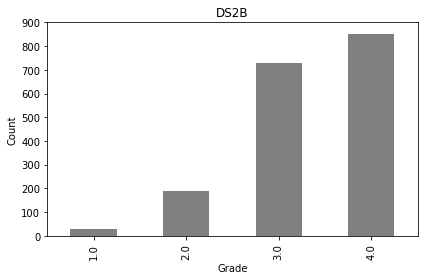

In [169]:
td = training_data_2_2.copy()
n = "2B"

td.groupby("grade").size().plot(kind='bar',stacked=True, color = "grey")
plt.title("DS" + str(n))
plt.ylabel("Count")
plt.xlabel("Grade")
plt.ylim(0, 900)
plt.tight_layout()
plt.savefig("kaggle_data_" + str(n) + "_grade_count.png")